In [8]:
# Import necessary modules
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pathlib import Path

%matplotlib widget

In [9]:
# Set main path of data and plot location
root_dir = Path.home() / "Documents"

# Paths to data sources
path_data = (root_dir / "data") # create data path
path_rtofs = (path_data / "rtofs")
path_gliders = (path_data / "gliders")
path_impact = (path_data / "impact_metrics")
path_impact_calculated = path_impact / "calculated"
path_impact_model = path_impact / "models"

In [10]:
# Specify the glider that we want to look at. 
glider_id = "ng645-20210613T0000"

In [11]:
# We already have a pickle file containing all the calculated metrics for the ng645, rtofs, gofs, and copernicus.
# These metrics are pulled from each model at the location closest in time and space to the glider transect
df = pd.read_pickle(path_impact_calculated / f'{glider_id}_combined_data.bak.pkl')
df

ocean_heat_content  mixed_layer_depth_from_temp  \
2021-06-13 06:00:00           21.109248                    15.000000   
2021-06-13 06:00:00           21.109248                    15.000000   
2021-06-13 06:00:00           21.109248                    15.000000   
2021-06-13 06:00:00           21.109248                    15.000000   
2021-06-13 12:00:00           20.007178                    15.000000   
...                                 ...                          ...   
2021-09-24 12:00:00           22.946902                    25.211411   
2021-09-24 12:00:00           22.946902                    25.211411   
2021-09-24 12:00:00           22.946902                    25.211411   
2021-09-24 12:00:00           22.946902                    25.211411   
2021-09-24 12:00:00           22.946902                    25.211411   

                     mixed_layer_temp_from_temp  \
2021-06-13 06:00:00                   28.208202   
2021-06-13 06:00:00                   28.208202   
2021-06-13 06:00:00                   28.208202   
2021-06-13 06:00:00                   28.208202   
2021-06-13 12:00:00                   28.111254   
...                                         ...   
2021-09-24 12:00:00                   27.744400   
2021-09-24 12:00:00                   27.744400   
2021-09-24 12:00:00                   27.744400   
2021-09-24 12:00:00                   27.744400   
2021-09-24 12:00:00                   27.744400   

                     mixed_layer_depth_from_density  \
2021-06-13 06:00:00                        15.00000   
2021-06-13 06:00:00                        15.00000   
2021-06-13 06:00:00                        15.00000   
2021-06-13 06:00:00                        15.00000   
2021-06-13 12:00:00                        15.00000   
...                                             ...   
2021-09-24 12:00:00                        18.49556   
2021-09-24 12:00:00                        18.49556   
2021-09-24 12:00:00                        18.49556   
2021-09-24 12:00:00                        18.49556   
2021-09-24 12:00:00                        18.49556   

                     mixed_layer_temp_from_density  average_temp_mldt_to_100m  \
2021-06-13 06:00:00                      28.208202                  23.446800   
2021-06-13 06:00:00                      28.208202                  23.446800   
2021-06-13 06:00:00                      28.208202                  23.446800   
2021-06-13 06:00:00                      28.208202                  23.446800   
2021-06-13 12:00:00                      28.111254                  23.368855   
...                                            ...                        ...   
2021-09-24 12:00:00                      27.718040                  24.447941   
2021-09-24 12:00:00                      27.718040                  24.447941   
2021-09-24 12:00:00                      27.718040                  24.447941   
2021-09-24 12:00:00                      27.718040                  24.447941   
2021-09-24 12:00:00                      27.718040                  24.447941   

                     average_temp_mlds_to_100m  average_temp_000m_to_100m  \
2021-06-13 06:00:00                  23.446800                  25.132820   
2021-06-13 06:00:00                  23.446800                  25.132820   
2021-06-13 06:00:00                  23.446800                  25.132820   
2021-06-13 06:00:00                  23.446800                  25.132820   
2021-06-13 12:00:00                  23.368855                  25.044657   
...                                        ...                        ...   
2021-09-24 12:00:00                  25.081779                  26.392223   
2021-09-24 12:00:00                  25.081779                  26.392223   
2021-09-24 12:00:00                  25.081779                  26.392223   
2021-09-24 12:00:00                  25.081779                  26.392223   
2021-09-24 12:00:00                  25.081779                

In [12]:
t0 = df.index.min()
t1 = df.index.max()

In [13]:
# Split out data sources into separate dataframes
rtofs = df[df.source == 'rtofs']
gofs = df[df.source == 'gofs']
copernicus = df[df.source == 'copernicus']
glider = df[df.source == 'ng645']

# Make sure there is data in each one
rtofs.shape, gofs.shape, copernicus.shape, glider.shape

((1049, 22), (1049, 22), (1049, 22), (1049, 22))

In [14]:
# This is a dictionary containing plot settings for each of the variables contained in the dataframe
vars = {}
vars['ocean_heat_content'] = dict(name='Ocean Heat Content', units = 'kJ cm-2', flip_y=False, ylim=[0, 130])
vars['mixed_layer_depth_from_temp'] = dict(name='MLD_temp', units='m', flip_y=True, ylim=[0, 55])
vars['mixed_layer_temp_from_temp'] = dict(name='MLT_temp', units='dec C', flip_y=False, ylim=[20, 32])
vars['potential_energy_anomaly_100m'] = dict(name='Potential Energy Anomaly (100m)', units='J m-3', flip_y=False, ylim=[100, 650])

vars['salinity_surface'] = dict(name='Surface Salinity', units=' ', flip_y=False, ylim=[28, 38])
vars['salinity_max'] = dict(name='Max Salinity ', units=' ', flip_y=False, ylim=[36, 37.2])
vars['salinity_max_depth'] = dict(name='Max Salinity - Depth', units='m', flip_y=True, ylim=[0, 205])

vars['average_temp_mldt_to_100m'] = dict(name='Mean Temp. (MLDt to 100m)', units='deg C', flip_y=False, ylim=[20, 32])

vars['average_temp_000m_to_100m'] = dict(name='Mean Temp. (0 to 100m)', units='deg C', flip_y=False, ylim=[20, 32])
vars['average_temp_100m_to_200m'] = dict(name='Mean Temp. (100 to 200m)', units='deg C', flip_y=False, ylim=[4, 25])
vars['average_temp_200m_to_300m'] = dict(name='Mean Temp. (200 to 300m)', units='deg C', flip_y=False, ylim=[4, 25])
vars['average_temp_300m_to_400m'] = dict(name='Mean Temp. (300 to 400m)', units='deg C', flip_y=False, ylim=[4, 25])
vars['average_temp_400m_to_500m'] = dict(name='Mean Temp. (400 to 500m)', units='deg C', flip_y=False, ylim=[4, 25])
vars['average_temp_500m_to_600m'] = dict(name='Mean Temp. (500 to 600m)', units='deg C', flip_y=False, ylim=[4, 25])
vars['average_temp_600m_to_700m'] = dict(name='Mean Temp. (600 to 700m)', units='deg C', flip_y=False, ylim=[4, 25])
vars['average_temp_700m_to_800m'] = dict(name='Mean Temp. (700 to 800m)', units='deg C', flip_y=False, ylim=[4, 25])
vars['average_temp_800m_to_900m'] = dict(name='Mean Temp. (800 to 900m)', units='deg C', flip_y=False, ylim=[4, 25])
vars['average_temp_900m_to_1000m'] = dict(name='Mean Temp. (900 to 1000m)', units='deg C', flip_y=False, ylim=[4, 25])

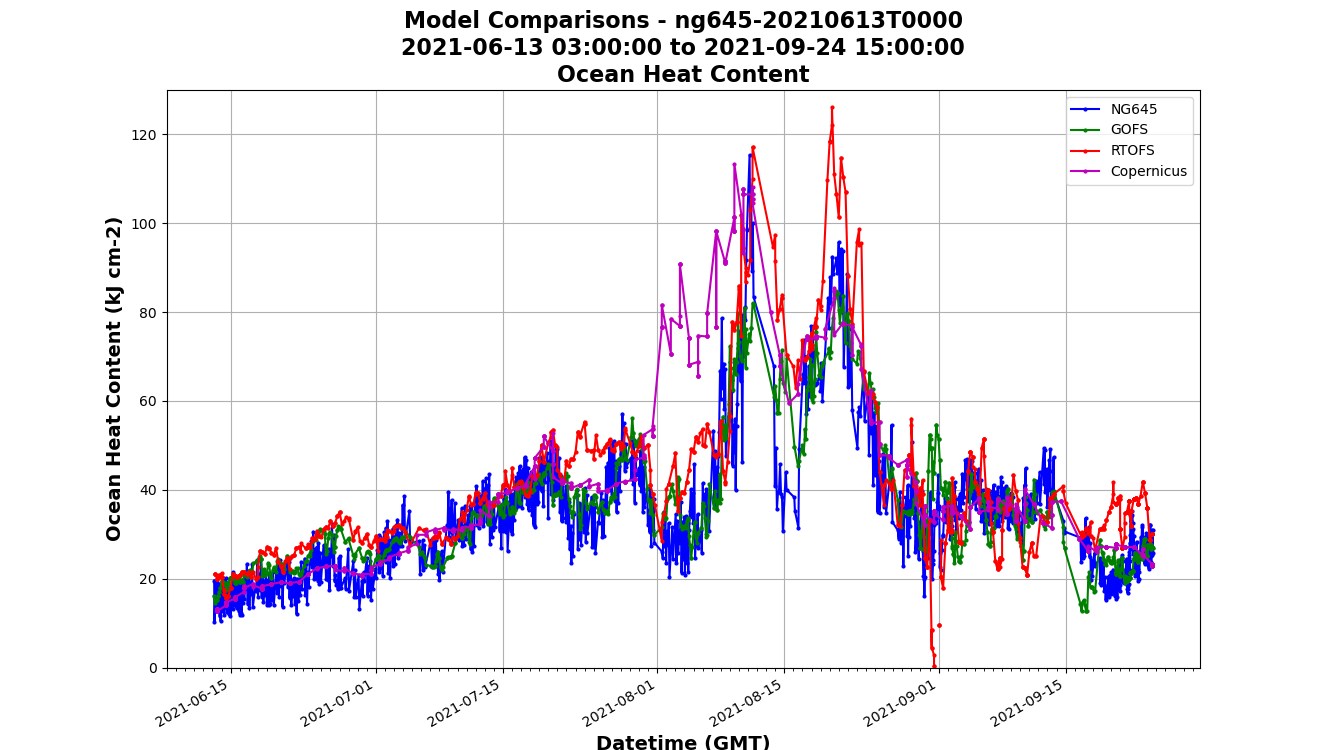

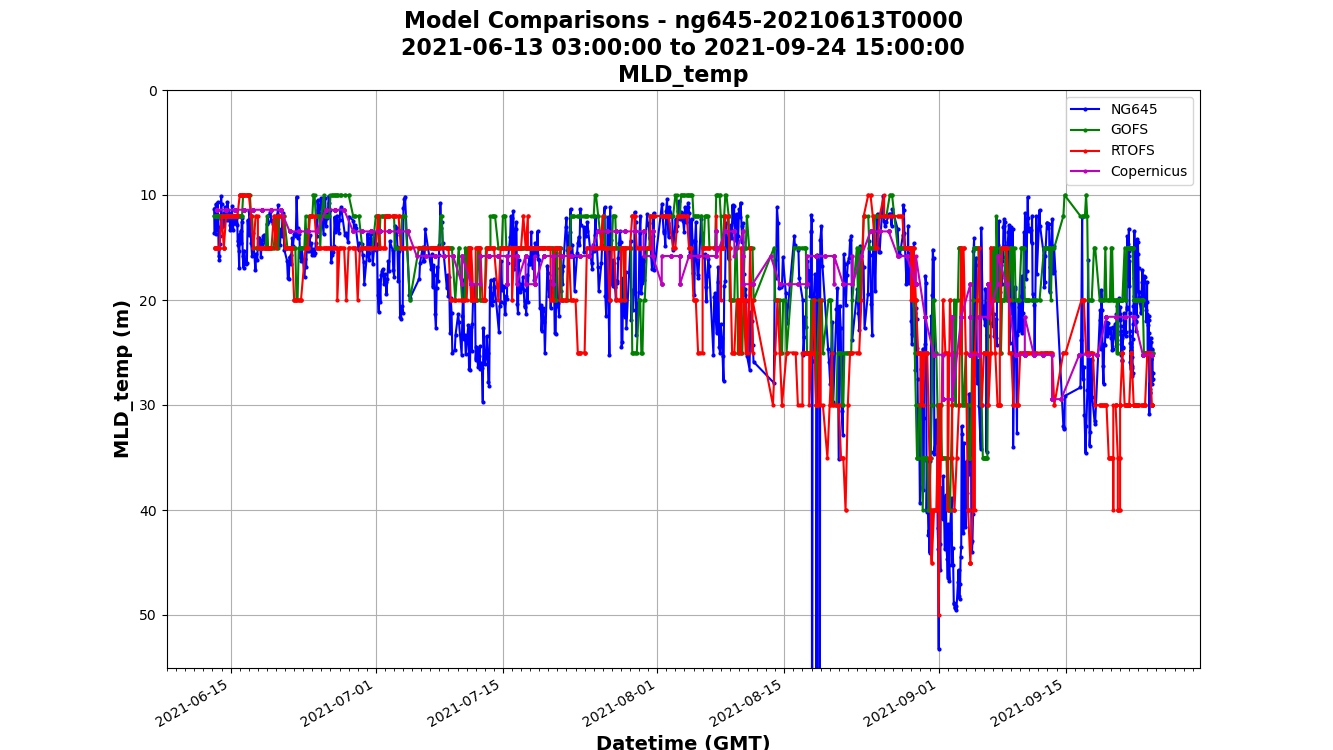

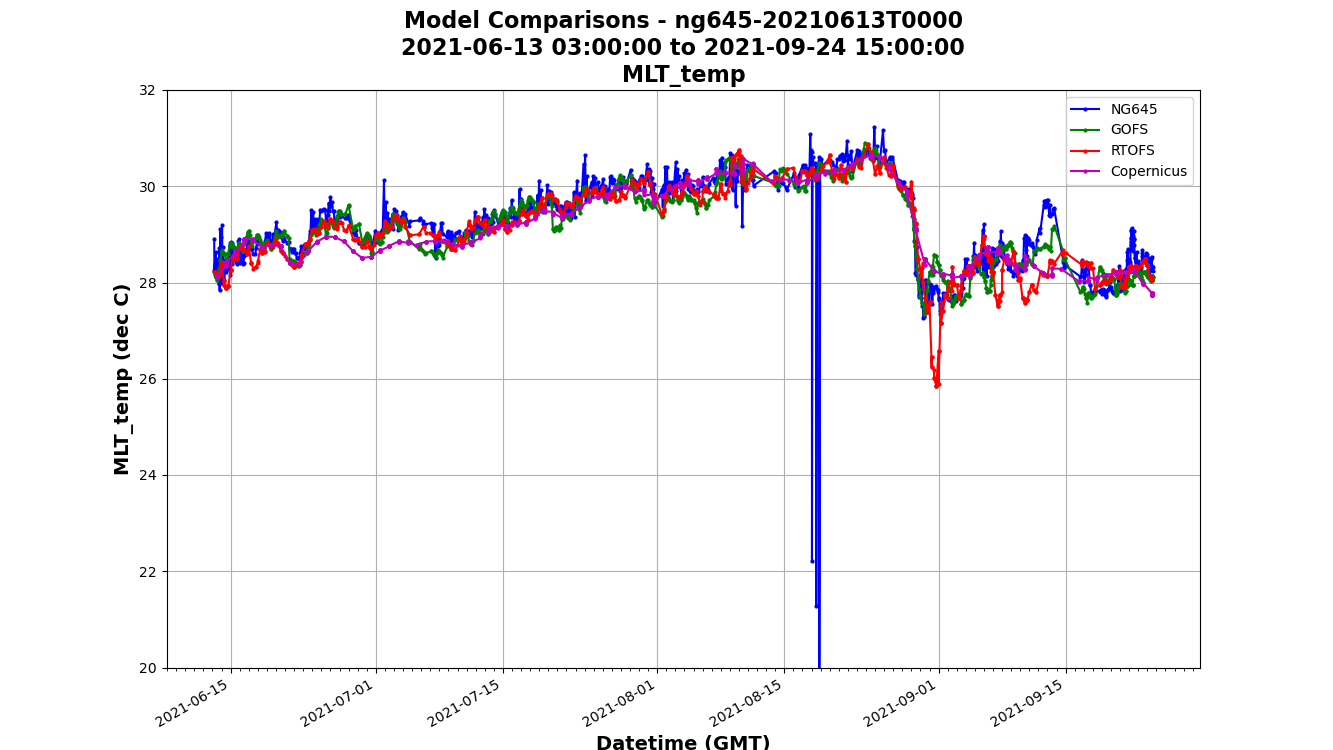

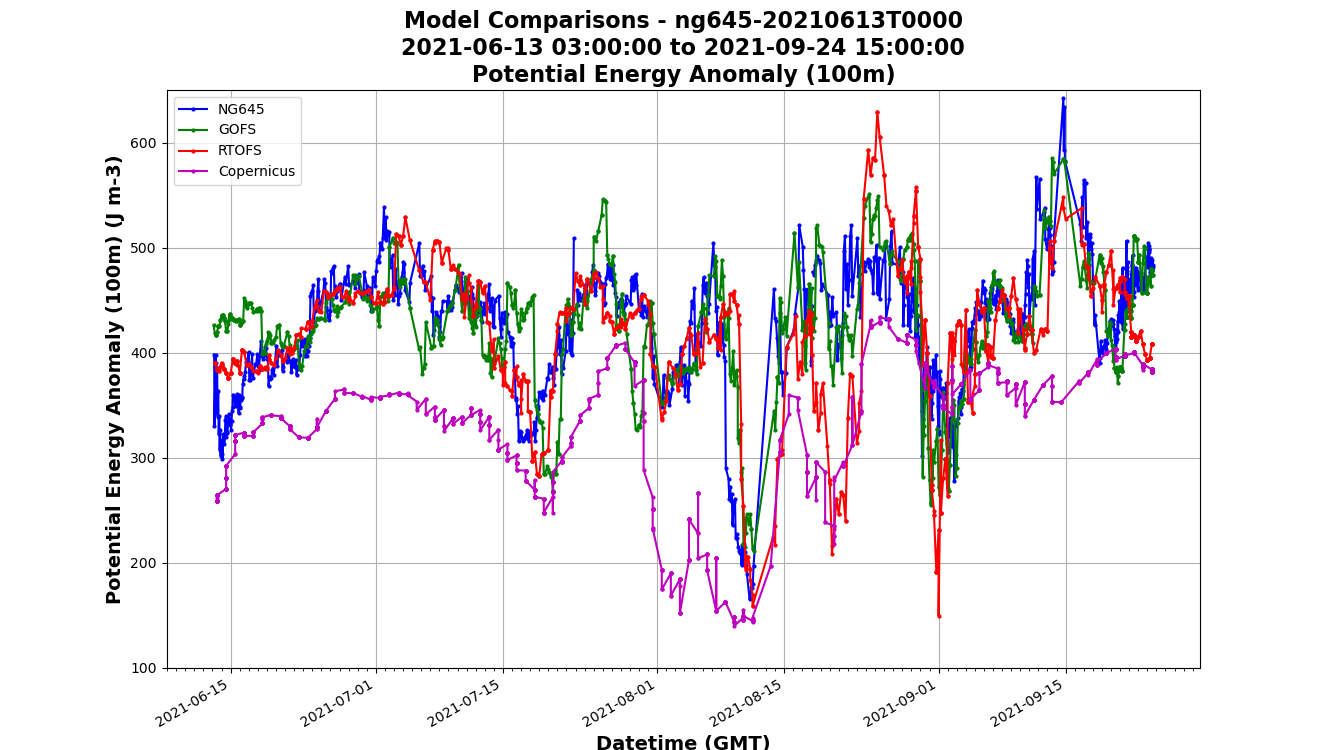

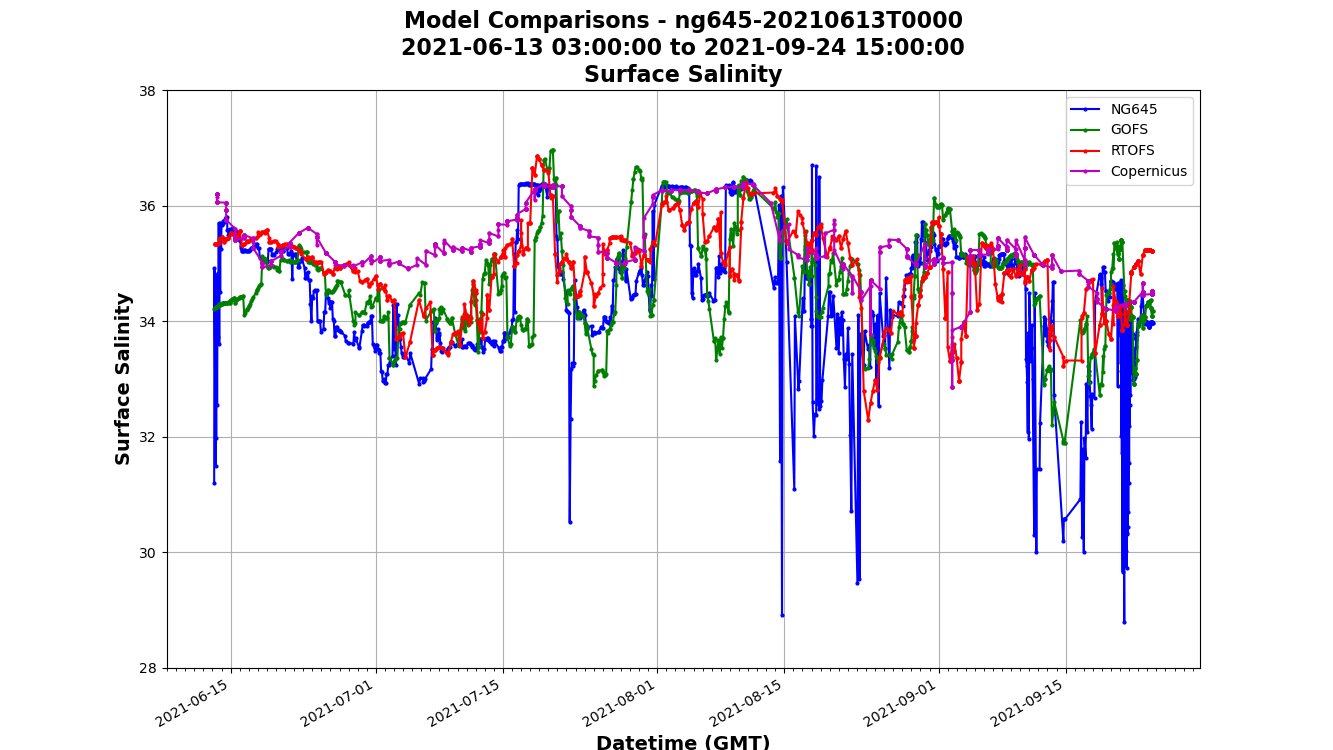

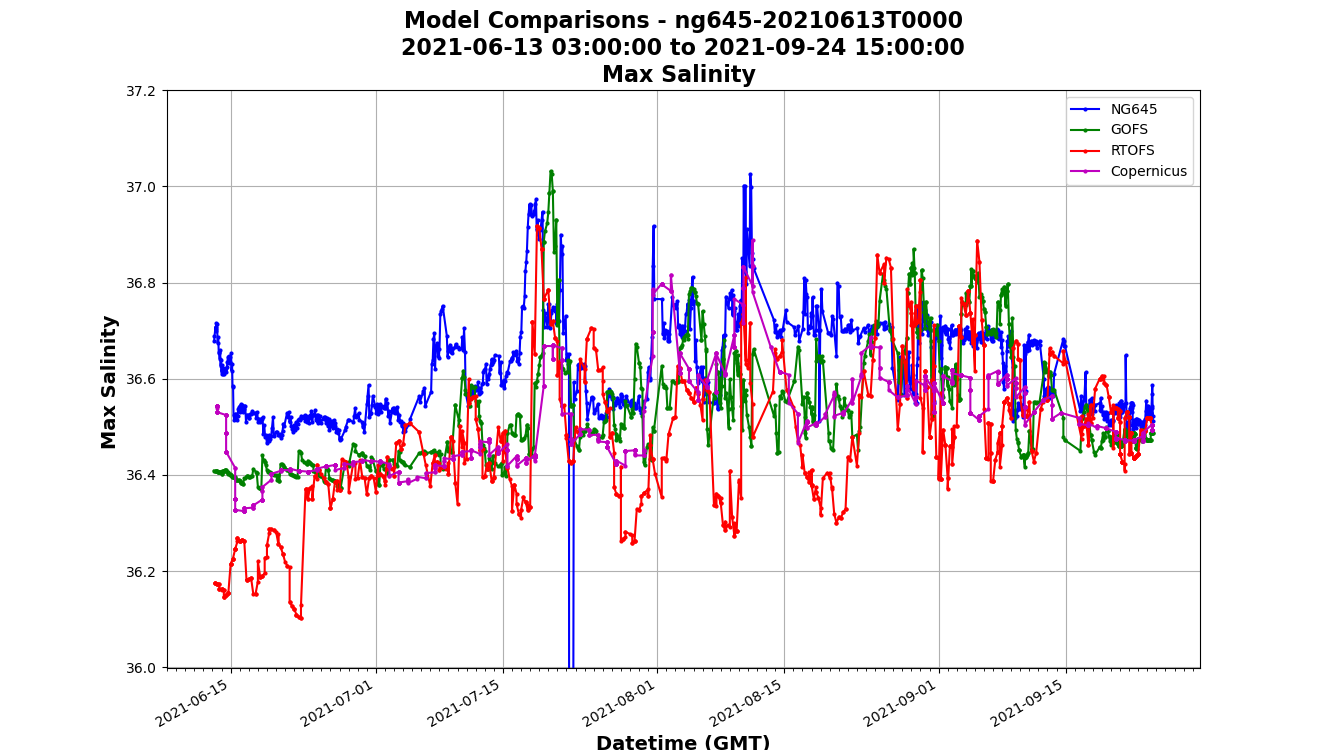

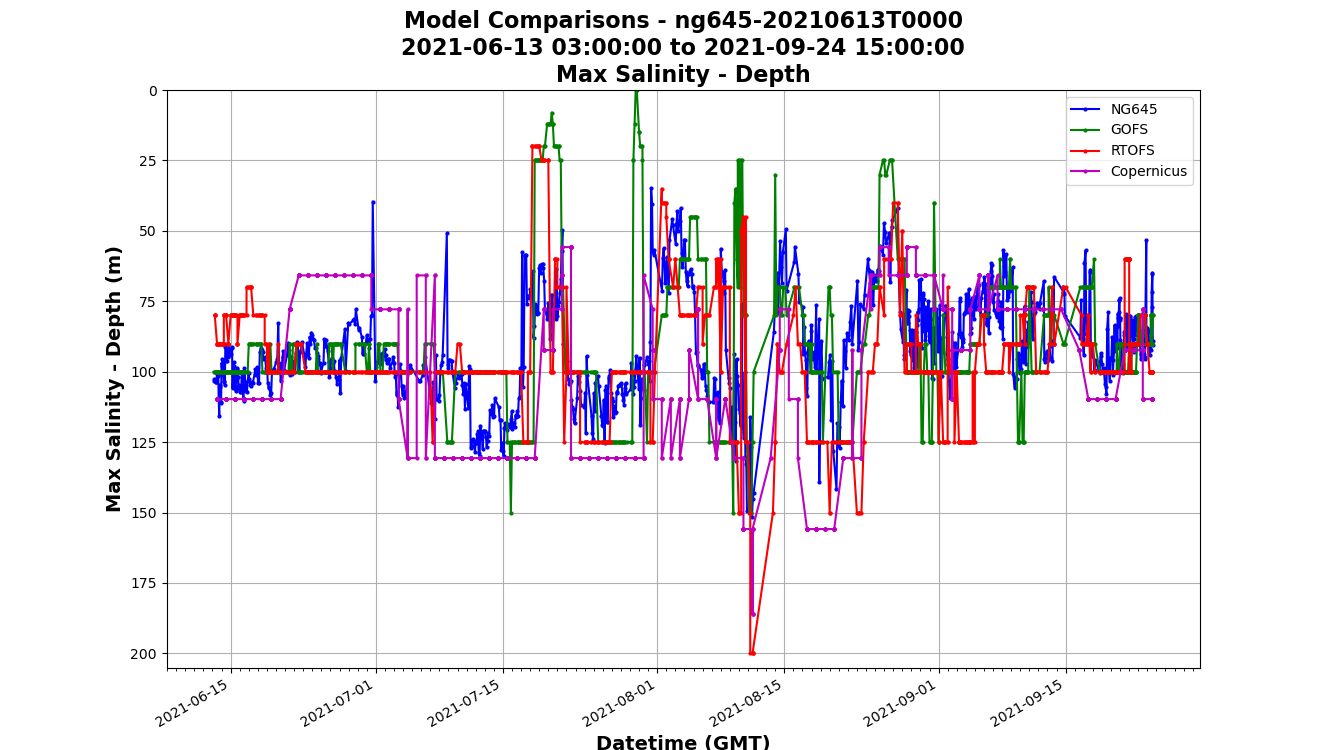

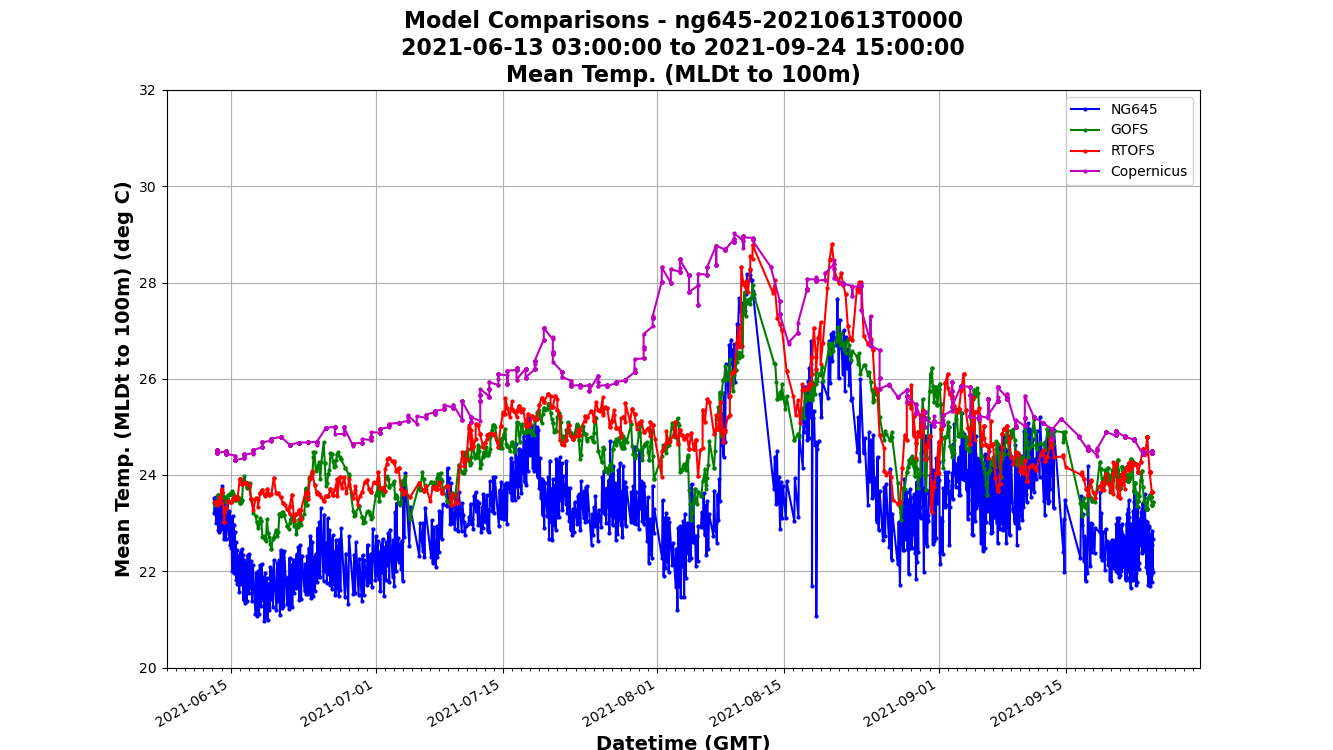

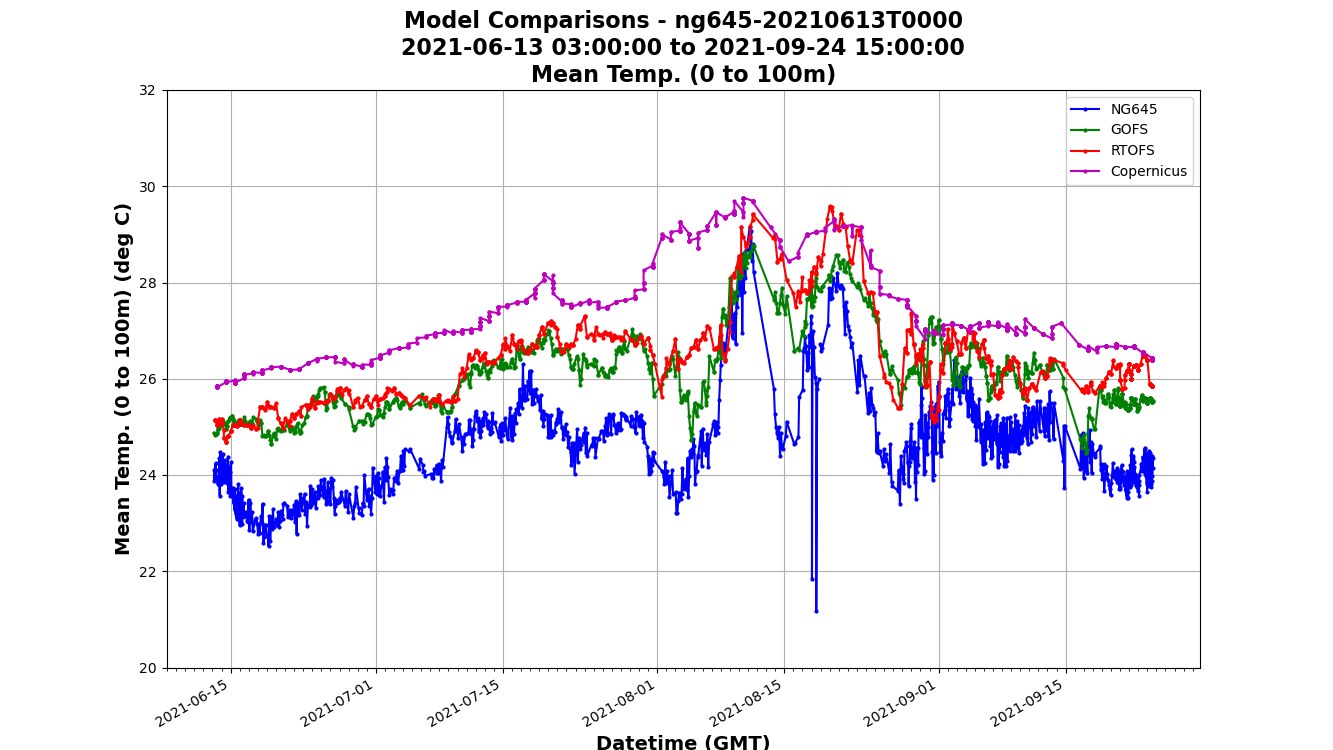

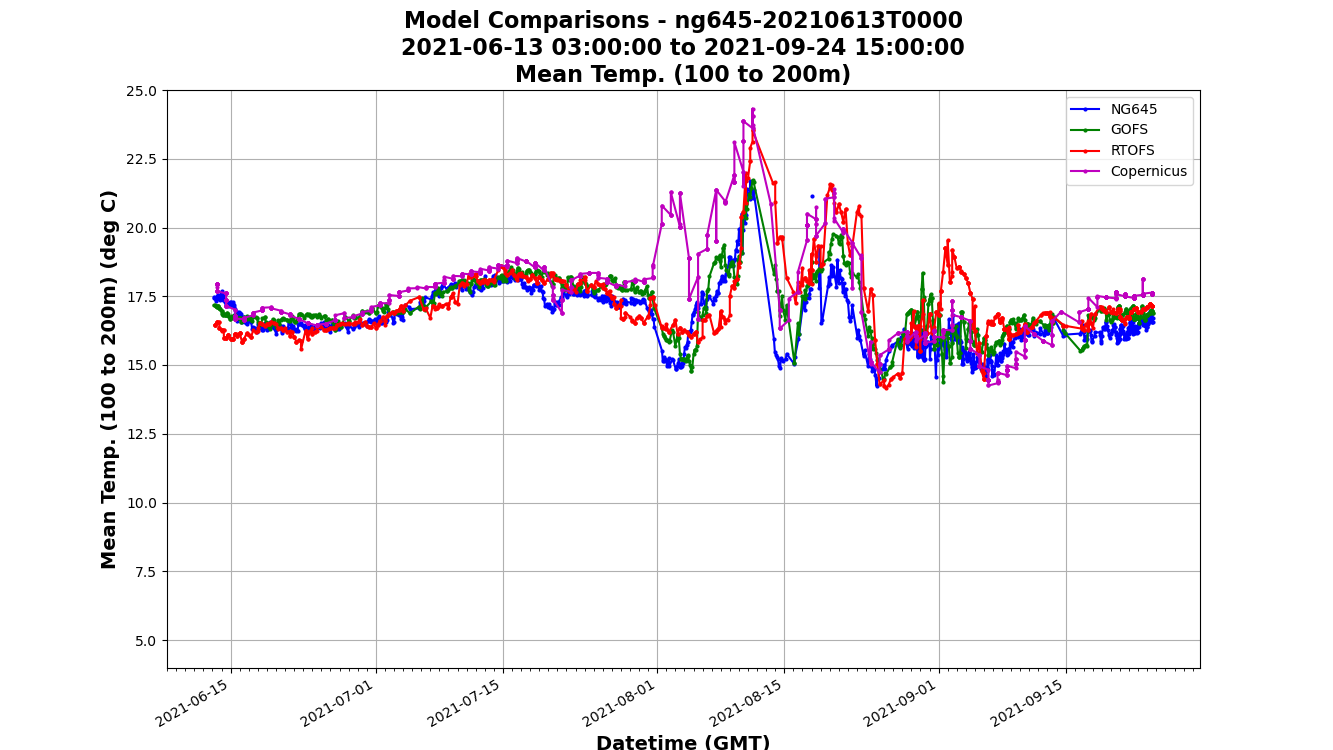

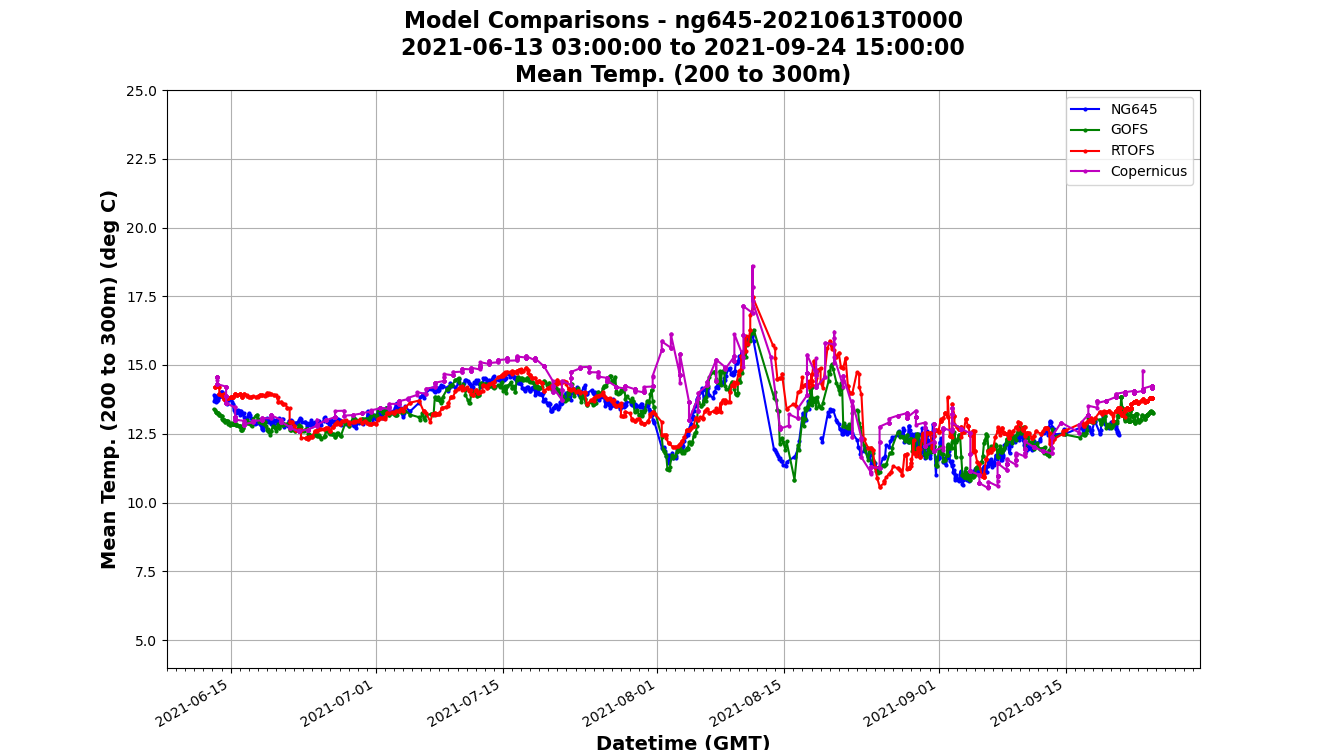

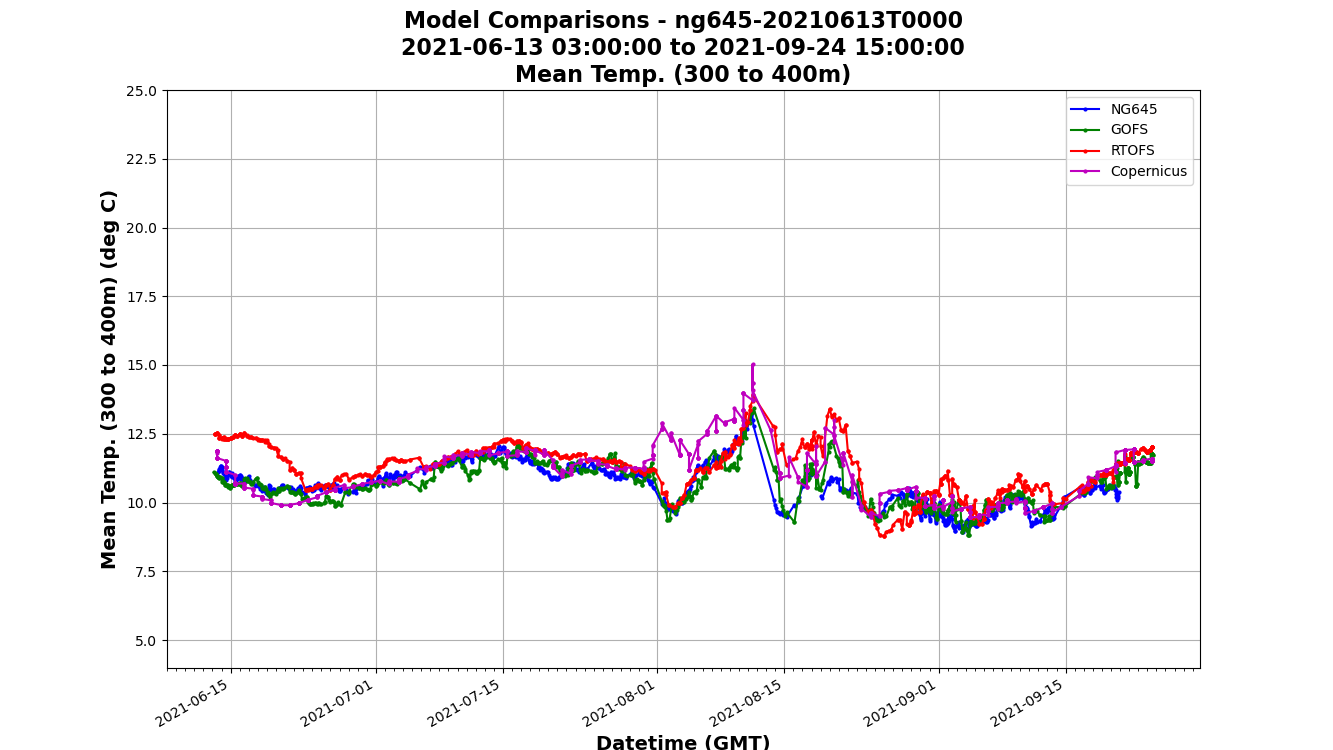

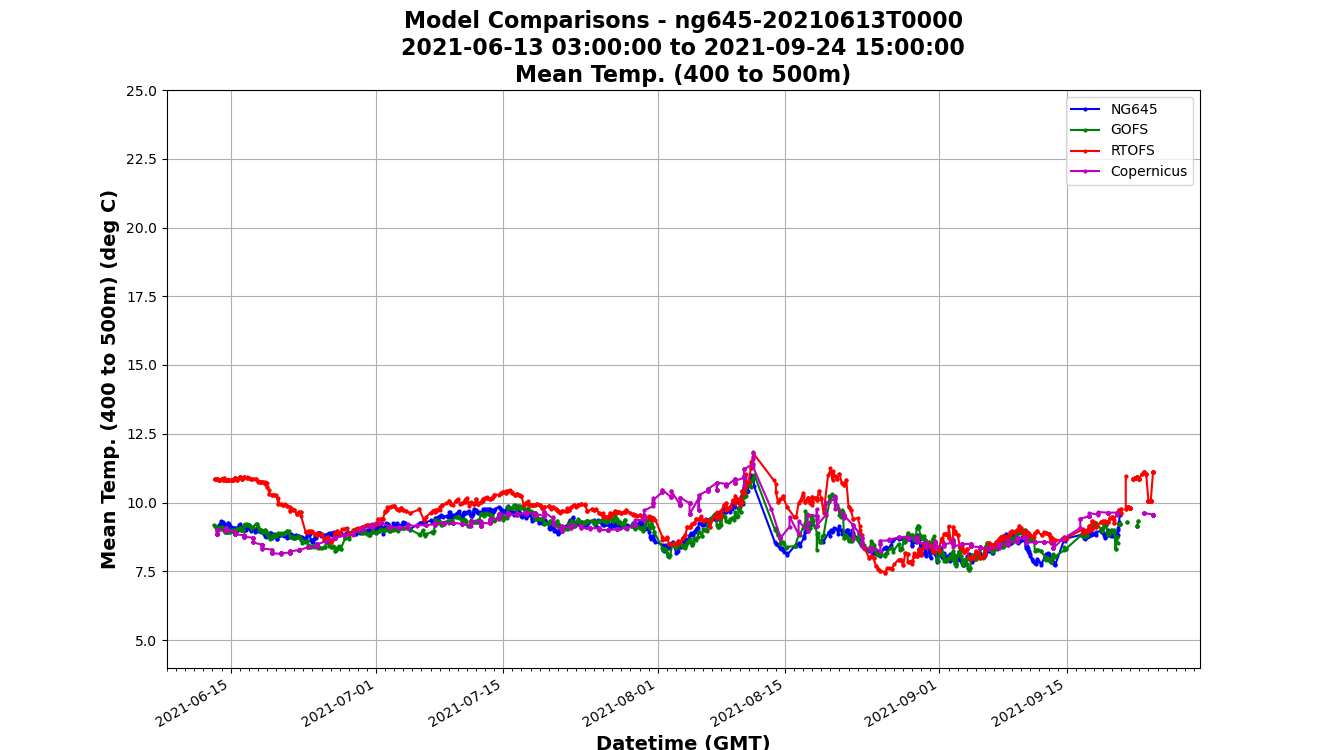

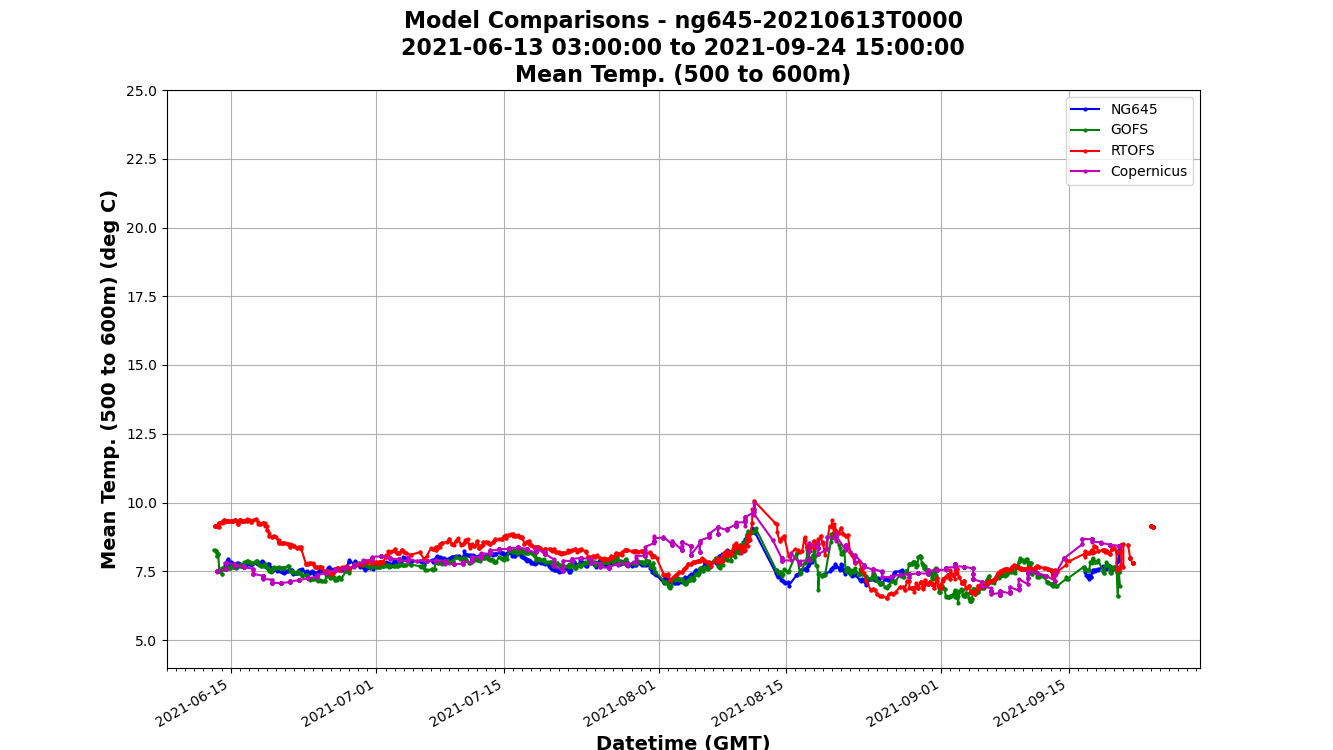

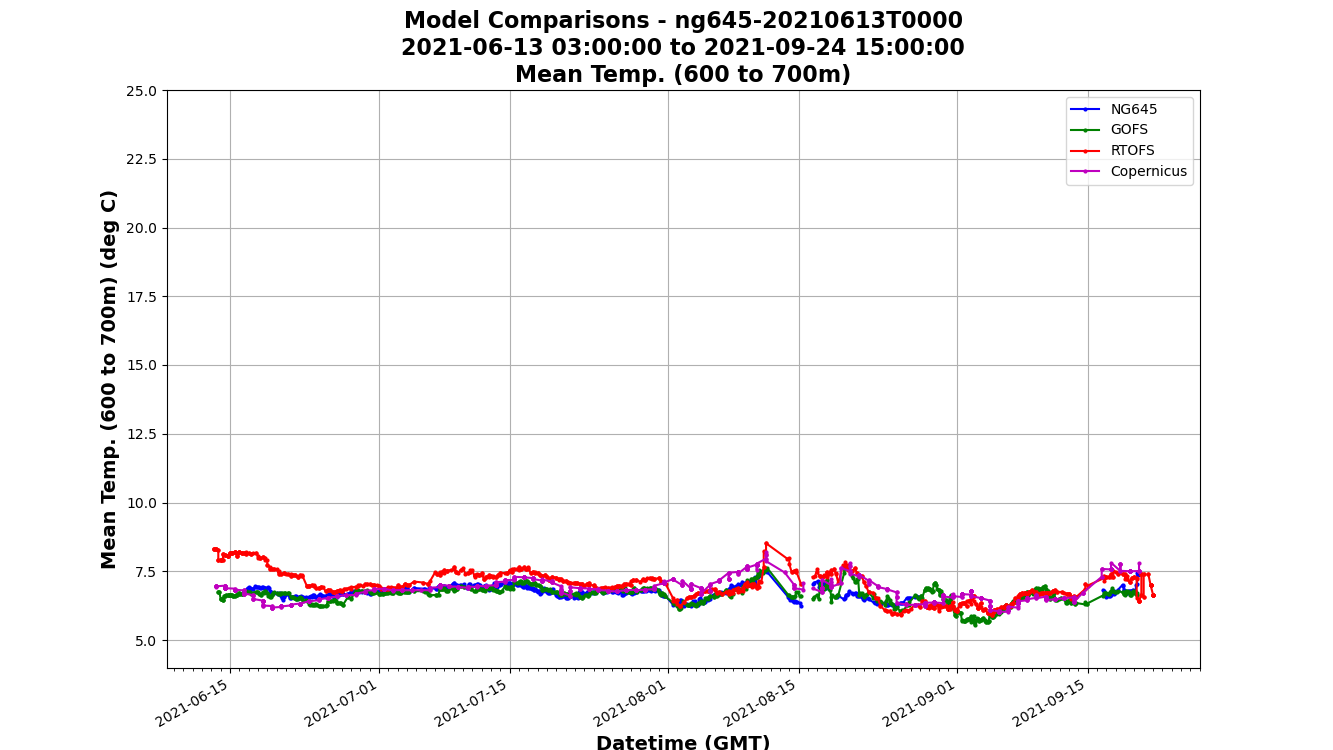

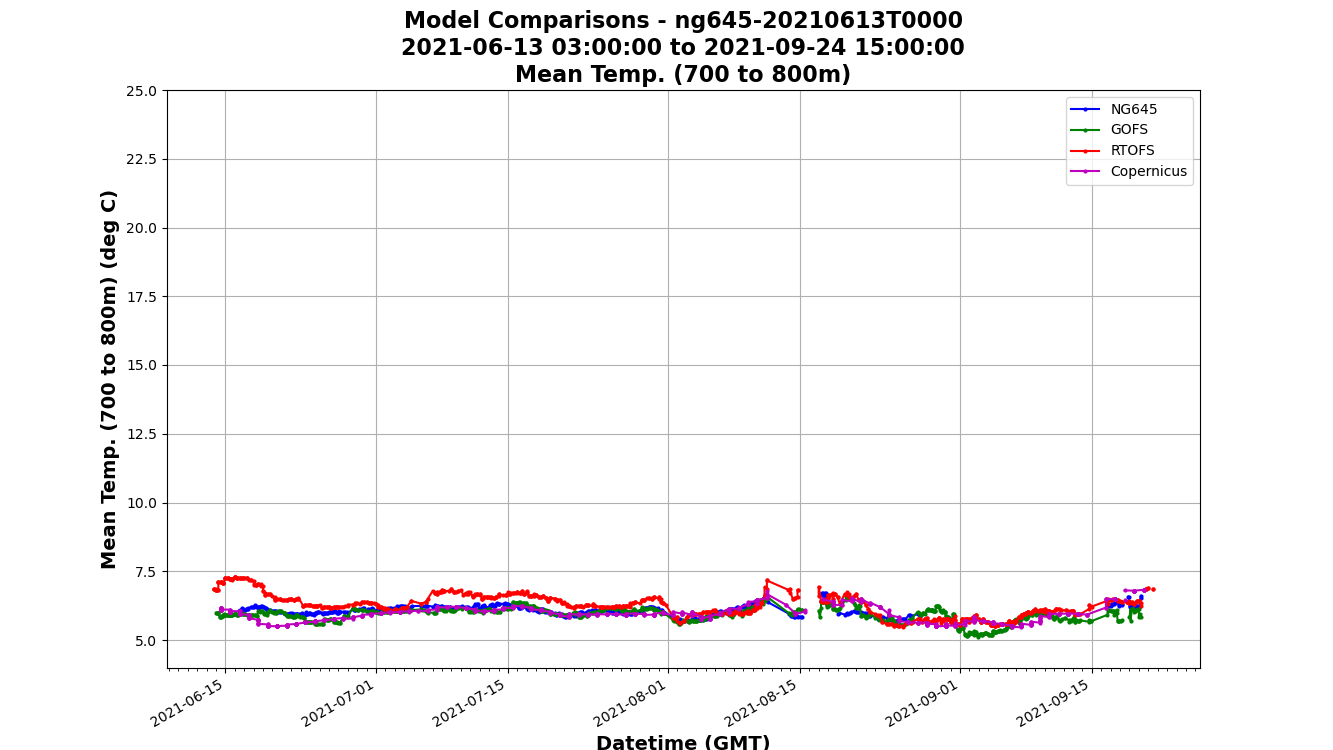

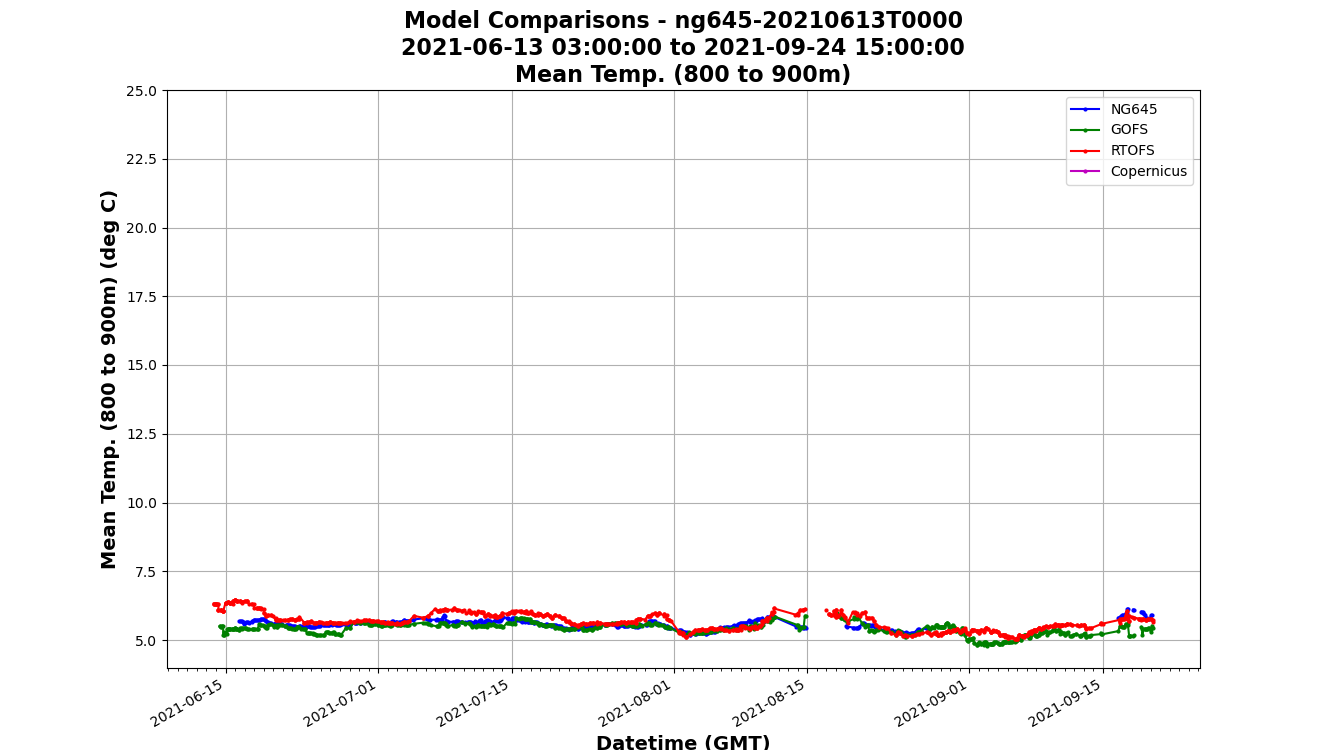

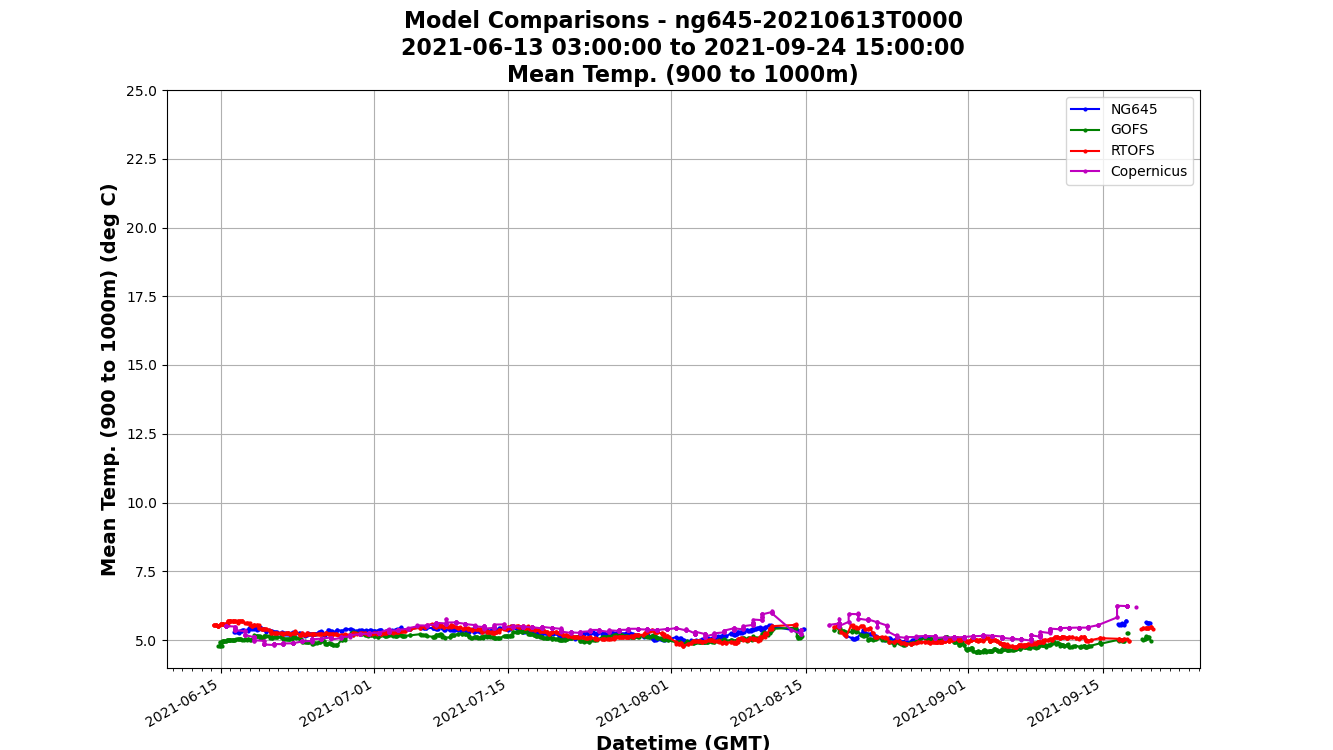

In [15]:
# Loop through each variable and plot a timeseries comapring each asset
for k, v in vars.items():
    var_title = v['name']
    if not v['units'] == ' ':
        var_title += f" ({v['units']})"

    # Create figure 
    fig, ax = plt.subplots(figsize=(13.333, 7.5))

    # Plot each model 
    h1 = ax.plot(glider.index, glider[k], 'b-o', markersize=2, label='NG645')
    h2 = ax.plot(gofs.index, gofs[k], 'g-o', markersize=2, label='GOFS')
    h3 = ax.plot(rtofs.index, rtofs[k], 'r-o', markersize=2, label='RTOFS')
    h4 = ax.plot(copernicus.index, copernicus[k], 'm-o', markersize=2, label='Copernicus')

    # Add grid
    ax.grid(True)

    # # Add minor grid
    ax.grid(True, which="major")
    # ax.grid(True, which="minor", linestyle="-.", linewidth=0.25, alpha=.5)
    # plt.minorticks_on()

    # Make the plot have minor ticks
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')

    # Set axis limits 
    ax.set_ylim(v['ylim'])

    # Invert axis if flip_y is True
    if v['flip_y']:
        ax.invert_yaxis()

    # Adjust axes labels
    ax.set_xlabel('Datetime (GMT)', fontsize=14, fontweight='bold')
    ax.set_ylabel(var_title, fontsize=14, fontweight='bold')

    # Create and set title
    title = f"Model Comparisons - {glider_id}\n{t0} to {t1}\n{v['name']}"
    ax.set_title(title, fontsize=16, fontweight="bold")

    # Add legend
    plt.legend()

    # # Save figure 
    # savedir = path_plot / f"{glid}"
    # export_fig(savedir, f'glider_{k}_{datefmt}.png', dpi=200)
    # plt.close()


# We can see several large peaks in the mixed layer depth calculated with temperature
These large peaks occur on 2021-08-18. There are several other peaks in the plots, but these are the largest.
Let's look at the glider dataframe in order to identify the exact profile/time that this peak occured

In [10]:
glider

ocean_heat_content  mixed_layer_depth_from_temp  \
2021-06-13 04:26:50           19.554736                    11.296164   
2021-06-13 05:11:16           10.332694                    13.638699   
2021-06-13 08:04:13           19.046816                    13.707911   
2021-06-13 08:48:22           13.606220                    10.849277   
2021-06-13 09:48:21           18.646906                    13.340768   
...                                 ...                          ...   
2021-09-24 11:28:42           26.047591                    27.661743   
2021-09-24 13:07:33           30.876271                    24.697740   
2021-09-24 13:29:57           25.384427                    24.777020   
2021-09-24 14:16:42           30.926651                    27.521564   
2021-09-24 14:39:05           25.684814                    26.907152   

                     mixed_layer_temp_from_temp  \
2021-06-13 04:26:50                   28.906364   
2021-06-13 05:11:16                   28.269860   
2021-06-13 08:04:13                   28.625036   
2021-06-13 08:48:22                   28.342660   
2021-06-13 09:48:21                   28.480628   
...                                         ...   
2021-09-24 11:28:42                   28.538777   
2021-09-24 13:07:33                   28.253661   
2021-09-24 13:29:57                   28.344855   
2021-09-24 14:16:42                   28.228906   
2021-09-24 14:39:05                   28.323005   

                     mixed_layer_depth_from_density  \
2021-06-13 04:26:50                       11.296164   
2021-06-13 05:11:16                       10.770082   
2021-06-13 08:04:13                       11.196683   
2021-06-13 08:48:22                       10.849277   
2021-06-13 09:48:21                       11.841960   
...                                             ...   
2021-09-24 11:28:42                       16.888878   
2021-09-24 13:07:33                       16.759504   
2021-09-24 13:29:57                       18.890272   
2021-09-24 14:16:42                       16.620417   
2021-09-24 14:39:05                       17.720469   

                     mixed_layer_temp_from_density  average_temp_mldt_to_100m  \
2021-06-13 04:26:50                      28.804785                  23.207523   
2021-06-13 05:11:16                      28.254433                  23.523290   
2021-06-13 08:04:13                      28.668457                  23.162097   
2021-06-13 08:48:22                      28.342660                  23.546848   
2021-06-13 09:48:21                      28.490413                  23.004802   
...                                            ...                        ...   
2021-09-24 11:28:42                      28.228358                  22.547032   
2021-09-24 13:07:33                      28.144115                  22.053439   
2021-09-24 13:29:57                      28.144093                  22.833434   
2021-09-24 14:16:42                      28.139643                  21.992252   
2021-09-24 14:39:05                      28.138879                  22.667328   

                     average_temp_mlds_to_100m  average_temp_000m_to_100m  \
2021-06-13 04:26:50                  23.207523                  24.112689   
2021-06-13 05:11:16                  23.712625                  23.883834   
2021-06-13 08:04:13                  23.263395                  24.250088   
2021-06-13 08:48:22                  23.546848                  23.949692   
2021-06-13 09:48:21                  23.058758                  24.101924   
...                                        ...                        ...   
2021-09-24 11:28:42                  23.667596                  24.403629   
2021-09-24 13:07:33                  22.441997                  23.985946   
2021-09-24 13:29:57                  23.387135                  24.352384   
2021-09-24 14:16:42                  22.569501                  24.135771   
2021-09-24 14:39:05                  23.446122                

# Find the exact glider profile
Since the peak we are looking for has the largest value in the entire timeseries. We can easily find the time at which it occured by using the .max() method on the MLD variable in the DataFrame and then using the .loc() method of the DataFrame to pick out that specific row

In [11]:
isolated = glider.loc[glider["mixed_layer_depth_from_temp"] == glider["mixed_layer_depth_from_temp"].max()]
isolated

ocean_heat_content  mixed_layer_depth_from_temp  \
2021-08-18 20:33:45                 NaN                    140.72118   

                     mixed_layer_temp_from_temp  \
2021-08-18 20:33:45                    18.22784   

                     mixed_layer_depth_from_density  \
2021-08-18 20:33:45                       142.83768   

                     mixed_layer_temp_from_density  average_temp_mldt_to_100m  \
2021-08-18 20:33:45                      18.139479                        NaN   

                     average_temp_mlds_to_100m  average_temp_000m_to_100m  \
2021-08-18 20:33:45                        NaN                        NaN   

                     average_temp_100m_to_200m  average_temp_200m_to_300m  \
2021-08-18 20:33:45                  17.789646                        NaN   

                     ...  average_temp_500m_to_600m  \
2021-08-18 20:33:45  ...                        NaN   

                     average_temp_600m_to_700m  average_temp_700m_to_800m  \
2021-08-18 20:33:45                        NaN                        NaN   

                     average_temp_800m_to_900m  average_temp_900m_to_1000m  \
2021-08-18 20:33:45                        NaN                         NaN   

                     potential_energy_anomaly_100m  salinity_surface  \
2021-08-18 20:33:45                            NaN          36.49711   

                     salinity_max  salinity_max_depth  source  
2021-08-18 20:33:45     36.511196            139.2605   ng645  

[1 rows x 22 columns]

The maximum MLD occured on 2021-08-18 20:33:45. 

Since the file we originally loaded only contains the calculated metrics, we will have to load the glider data and go through the process of calculating the MLD again.

In [5]:
# Create a variable for the profile that we want to pick out
profile_time = "2021-08-18 20:33:45"

# Create path to glider file. This is the standard location on my computer where I store glider data downloaded from erddap.
glider_pickle = path_gliders / f"{glider_id}_data.pkl"
glider_pickle

PosixPath('/Users/mikesmith/Documents/data/gliders/ng645-20210613T0000_data.pkl')

In [6]:
try:
    ng645 = pd.read_pickle(glider_pickle)
except FileNotFoundError:
    # Download glider data from erddap with dataset id
    ng645 = get_glider_by_id(glider_id)
    ng645.to_pickle(glider_pickle) # Save glider data to pickle file

ng645

longitude (degrees_east)  latitude (degrees_north)  \
time (UTC)                                                                
2021-06-13 04:26:50                -94.591942                 27.643408   
2021-06-13 04:26:50                -94.591942                 27.643408   
2021-06-13 04:26:50                -94.591942                 27.643408   
2021-06-13 04:26:50                -94.591942                 27.643408   
2021-06-13 04:26:50                -94.591942                 27.643408   
...                                       ...                       ...   
2021-09-24 14:39:05                -88.167206                 29.205790   
2021-09-24 14:39:05                -88.167206                 29.205790   
2021-09-24 14:39:05                -88.167206                 29.205790   
2021-09-24 14:39:05                -88.167206                 29.205790   
2021-09-24 14:39:05                -88.167206                 29.205790   

                     pressure (decibar)   depth (m)  temperature (degrees_C)  \
time (UTC)                                                                     
2021-06-13 04:26:50            0.279798    0.277945                  29.0704   
2021-06-13 04:26:50            0.189863    0.188605                  29.0598   
2021-06-13 04:26:50            0.139899    0.138972                  29.0657   
2021-06-13 04:26:50            0.189863    0.188605                  29.0679   
2021-06-13 04:26:50            0.259812    0.258092                  29.0700   
...                                 ...         ...                      ...   
2021-09-24 14:39:05          192.345050  190.959230                  15.1129   
2021-09-24 14:39:05          192.963730  191.573170                  15.0898   
2021-09-24 14:39:05          193.612320  192.216780                  15.0932   
2021-09-24 14:39:05          193.971540  192.573260                  15.0869   
2021-09-24 14:39:05          194.390660  192.989150                  15.0743   

                     salinity (1)  conductivity (mS cm-1)  density (kg m-3)  
time (UTC)                                                                   
2021-06-13 04:26:50     31.186760               51.763603        1019.18286  
2021-06-13 04:26:50     31.188139               51.755400        1019.18700  
2021-06-13 04:26:50     31.188772               51.762000        1019.18536  
2021-06-13 04:26:50     31.189420               51.765100        1019.18530  
2021-06-13 04:26:50     31.188171               51.765297        1019.18396  
...                           ...                     ...               ...  
2021-09-24 14:39:05     36.032272               44.243896        1027.59770  
2021-09-24 14:39:05     36.028183               44.216400        1027.60240  
2021-09-24 14:39:05     36.028347               44.220300        1027.60460  
2021-09-24 14:39:05     36.027700               44.213400        1027.60720  
2021-09-24 14:39:05     36.022964               44.195700        1027.60820  

[780197 rows x 8 columns]

In [7]:
ng645 = ng645.reset_index()
ng645 = ng645.rename({
    "time (UTC)": "time",
    "longitude (degrees_east)": "lon",
    "latitude (degrees_north)": "lat",
    "pressure (decibar)": "pressure",
    "temperature (degrees_C)": "temp",
    "depth (m)": "depth",
    "salinity (1)": "salinity",
    "conductivity (mS cm-1)": "conductivity"
}, axis=1)
ng645 = ng645.set_index("time").sort_index()
ng645

lon        lat    pressure       depth     temp  \
time                                                                         
2021-06-13 04:26:50 -94.591942  27.643408    0.279798    0.277945  29.0704   
2021-06-13 04:26:50 -94.591942  27.643408    0.189863    0.188605  29.0598   
2021-06-13 04:26:50 -94.591942  27.643408    0.139899    0.138972  29.0657   
2021-06-13 04:26:50 -94.591942  27.643408    0.189863    0.188605  29.0679   
2021-06-13 04:26:50 -94.591942  27.643408    0.259812    0.258092  29.0700   
...                        ...        ...         ...         ...      ...   
2021-09-24 14:39:05 -88.167206  29.205790  192.345050  190.959230  15.1129   
2021-09-24 14:39:05 -88.167206  29.205790  192.963730  191.573170  15.0898   
2021-09-24 14:39:05 -88.167206  29.205790  193.612320  192.216780  15.0932   
2021-09-24 14:39:05 -88.167206  29.205790  193.971540  192.573260  15.0869   
2021-09-24 14:39:05 -88.167206  29.205790  194.390660  192.989150  15.0743   

                      salinity  conductivity  density (kg m-3)  
time                                                            
2021-06-13 04:26:50  31.186760     51.763603        1019.18286  
2021-06-13 04:26:50  31.188139     51.755400        1019.18700  
2021-06-13 04:26:50  31.188772     51.762000        1019.18536  
2021-06-13 04:26:50  31.189420     51.765100        1019.18530  
2021-06-13 04:26:50  31.188171     51.765297        1019.18396  
...                        ...           ...               ...  
2021-09-24 14:39:05  36.032272     44.243896        1027.59770  
2021-09-24 14:39:05  36.028183     44.216400        1027.60240  
2021-09-24 14:39:05  36.028347     44.220300        1027.60460  
2021-09-24 14:39:05  36.027700     44.213400        1027.60720  
2021-09-24 14:39:05  36.022964     44.195700        1027.60820  

[780197 rows x 8 columns]

In [8]:
profile = ng645.loc[pd.IndexSlice[profile_time:profile_time],:]
profile

lon        lat   pressure      depth     temp  \
time                                                                       
2021-08-18 20:33:45 -89.415428  28.095915  138.24925  137.28308  18.2597   
2021-08-18 20:33:45 -89.415428  28.095915  138.40941  137.44206  18.2508   
2021-08-18 20:33:45 -89.415428  28.095915  138.68970  137.72029  18.2320   
2021-08-18 20:33:45 -89.415428  28.095915  139.04005  138.06808  18.2300   
2021-08-18 20:33:45 -89.415428  28.095915  139.44046  138.46556  18.2394   
2021-08-18 20:33:45 -89.415428  28.095915  139.83086  138.85309  18.2379   
2021-08-18 20:33:45 -89.415428  28.095915  140.24127  139.26050  18.2436   
2021-08-18 20:33:45 -89.415428  28.095915  140.73175  139.74739  18.2304   
2021-08-18 20:33:45 -89.415428  28.095915  141.22224  140.23428  18.2022   
2021-08-18 20:33:45 -89.415428  28.095915  141.71274  140.72118  18.1524   
2021-08-18 20:33:45 -89.415428  28.095915  142.22327  141.22795  18.0251   
2021-08-18 20:33:45 -89.415428  28.095915  142.75380  141.75460  17.9746   
2021-08-18 20:33:45 -89.415428  28.095915  143.31438  142.31105  17.9065   
2021-08-18 20:33:45 -89.415428  28.095915  143.84490  142.83768  17.7681   
2021-08-18 20:33:45 -89.415428  28.095915  144.41547  143.40405  17.6803   
2021-08-18 20:33:45 -89.415428  28.095915  144.99606  143.98038  17.5453   
2021-08-18 20:33:45 -89.415428  28.095915  145.61668  144.59644  17.4009   
2021-08-18 20:33:45 -89.415428  28.095915  146.22730  145.20256  17.3359   
2021-08-18 20:33:45 -89.415428  28.095915  146.86794  145.83849  17.3004   
2021-08-18 20:33:45 -89.415428  28.095915  147.34842  146.31543  17.2731   
2021-08-18 20:33:45 -89.415428  28.095915  147.85895  146.82219  17.2265   
2021-08-18 20:33:45 -89.415428  28.095915  148.47957  147.43825  17.1309   
2021-08-18 20:33:45 -89.415428  28.095915  148.96004  147.91518  17.0678   
2021-08-18 20:33:45 -89.415428  28.095915  149.37047  148.32257  17.0377   

                      salinity  conductivity  density (kg m-3)  
time                                                            
2021-08-18 20:33:45  36.497110     47.972496         1026.9629  
2021-08-18 20:33:45  36.494800     47.960600         1026.9640  
2021-08-18 20:33:45  36.494675     47.940998         1026.9700  
2021-08-18 20:33:45  36.499400     47.944600         1026.9756  
2021-08-18 20:33:45  36.506012     47.962300         1026.9800  
2021-08-18 20:33:45  36.506520     47.961502         1026.9825  
2021-08-18 20:33:45  36.511196     47.973100         1026.9865  
2021-08-18 20:33:45  36.508920     47.956900         1026.9901  
2021-08-18 20:33:45  36.504177     47.922203         1026.9958  
2021-08-18 20:33:45  36.494102     47.858803         1027.0028  
2021-08-18 20:33:45  36.497738     47.730797         1027.0399  
2021-08-18 20:33:45  36.458683     47.633100         1027.0250  
2021-08-18 20:33:45  36.451866     47.554700         1027.0393  
2021-08-18 20:33:45  36.438140     47.395400         1027.0657  
2021-08-18 20:33:45  36.439327     47.306000         1027.0908  
2021-08-18 20:33:45  36.408707     47.131100         1027.1034  
2021-08-18 20:33:45  36.378407     46.947197         1027.1185  
2021-08-18 20:33:45  36.375500     46.877000         1027.1349  
2021-08-18 20:33:45  36.368320     46.832397         1027.1409  
2021-08-18 20:33:45  36.366108     46.801903         1027.1480  
2021-08-18 20:33:45  36.357243     46.743896         1027.1548  
2021-08-18 20:33:45  36.345600     46.632300         1027.1719  
2021-08-18 20:33:45  36.337620     46.558400         1027.1832  
2021-08-18 20:33:45  36.332024     46.521202         1027.1880

It looks like this profile doesn't have any depths shallower than 137.28308.
Let's look at the other profiles on this day.

In [9]:
d0 = "2021-08-18"
d1 = "2021-08-19 00:00:00"

profiles = ng645.loc[pd.IndexSlice[d0:d1],:]
profiles

lon        lat    pressure       depth     temp  \
time                                                                         
2021-08-18 01:02:19 -89.559296  28.013130    0.250208    0.248544  30.7405   
2021-08-18 01:02:19 -89.559296  28.013130    0.220183    0.218719  30.7410   
2021-08-18 01:02:19 -89.559296  28.013130    0.260216    0.258486  30.7438   
2021-08-18 01:02:19 -89.559296  28.013130    0.230191    0.228660  30.7452   
2021-08-18 01:02:19 -89.559296  28.013130    0.200166    0.198835  30.7582   
...                        ...        ...         ...         ...      ...   
2021-08-18 23:07:16 -89.469421  28.079018  144.885960  143.871080  17.3084   
2021-08-18 23:07:16 -89.469421  28.079018  145.886950  144.864720  17.1653   
2021-08-18 23:07:16 -89.469421  28.079018  146.928010  145.898120  17.1588   
2021-08-18 23:07:16 -89.469421  28.079018  147.898970  146.861920  17.0501   
2021-08-18 23:07:16 -89.469421  28.079018  148.469540  147.428300  17.0360   

                      salinity  conductivity  density (kg m-3)  
time                                                            
2021-08-18 01:02:19  33.899765     57.489700        1020.64870  
2021-08-18 01:02:19  33.900227     57.490902        1020.64874  
2021-08-18 01:02:19  33.900265     57.493900        1020.64795  
2021-08-18 01:02:19  33.909462     57.509197        1020.65424  
2021-08-18 01:02:19  33.908768     57.521700        1020.64910  
...                        ...           ...               ...  
2021-08-18 23:07:16  36.361725     46.832200        1027.12510  
2021-08-18 23:07:16  36.362490     46.685900        1027.16500  
2021-08-18 23:07:16  36.346690     46.661602        1027.15920  
2021-08-18 23:07:16  36.331577     46.532800        1027.17820  
2021-08-18 23:07:16  36.326984     46.513298        1027.18070  

[836 rows x 8 columns]

In [17]:
profiles.index.unique()

DatetimeIndex(['2021-08-18 01:02:19', '2021-08-18 01:12:17',
               '2021-08-18 02:49:09', '2021-08-18 06:16:50',
               '2021-08-18 08:49:09', '2021-08-18 12:26:06',
               '2021-08-18 12:36:40', '2021-08-18 14:52:07',
               '2021-08-18 20:18:19', '2021-08-18 20:33:45',
               '2021-08-18 23:07:16'],
              dtype='datetime64[ns]', name='time', freq=None)

In [18]:
grouped = profiles.groupby(level=0)

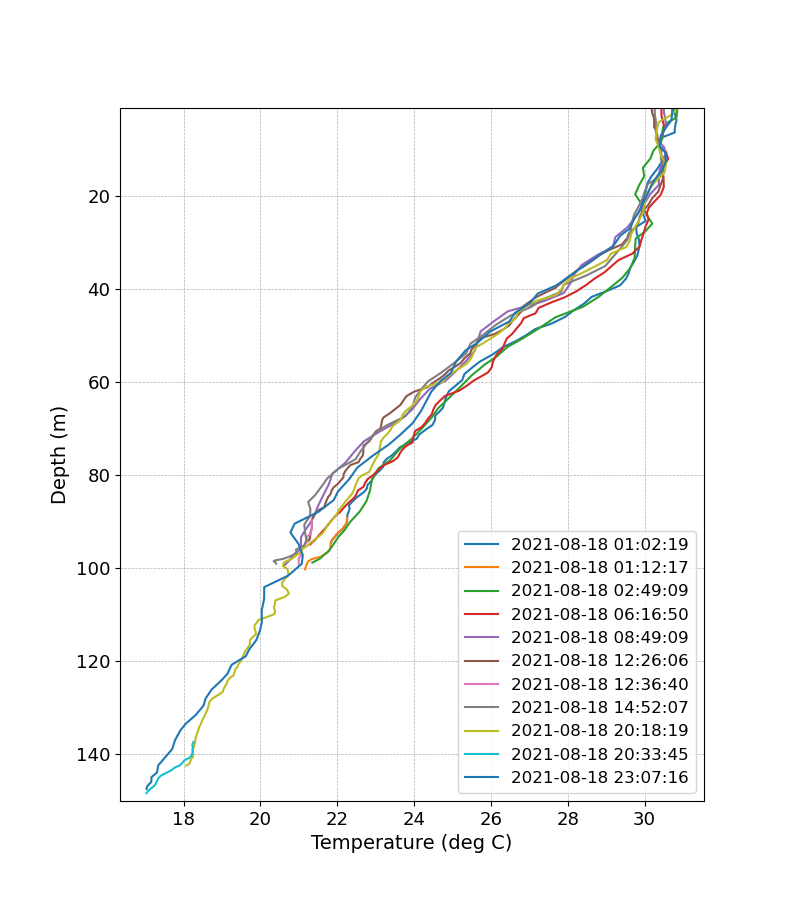

In [19]:
fig, ax = plt.subplots(figsize=(8, 9))
plt.subplots_adjust(right=0.88, left=0.15)

for g, new_df in grouped:
    ax.plot(new_df["temp"], new_df["depth"],
                label=g
    )
    
ax.set_ylim([150, 1])
ax.grid(True, linestyle='--', linewidth=.5)
ax.tick_params(axis='both', labelsize=13)
ax.set_xlabel('Temperature (deg C)', fontsize=14)
ax.set_ylabel('Depth (m)', fontsize=14)

h, l = ax.get_legend_handles_labels()  # get labels and handles from ax1

ax.legend(h, l, ncol=1, loc='lower right', fontsize=12)
# plt.close()

/var/folders/lx/b066x4p940dg_b96y7_yj8400000gn/T/ipykernel_83275/272136596.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8, 9))


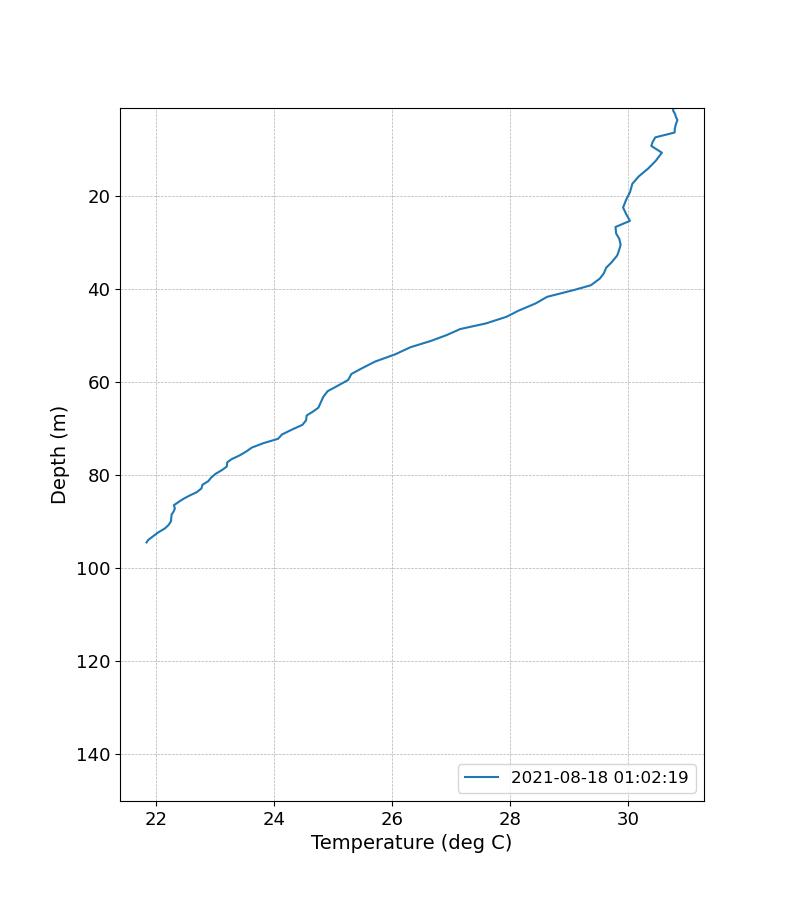

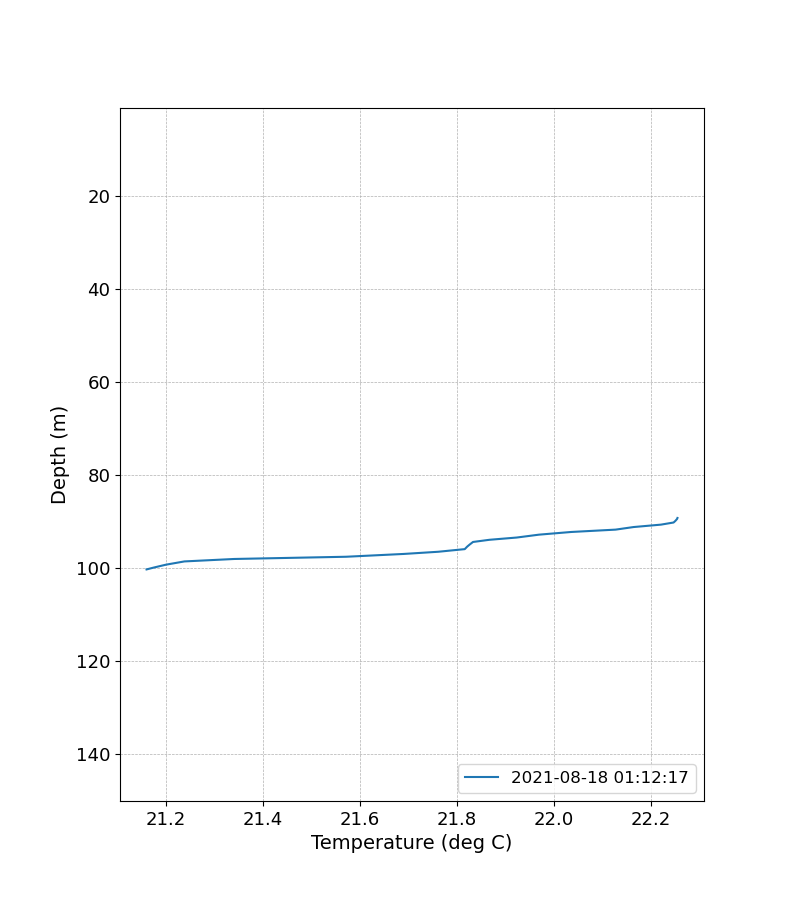

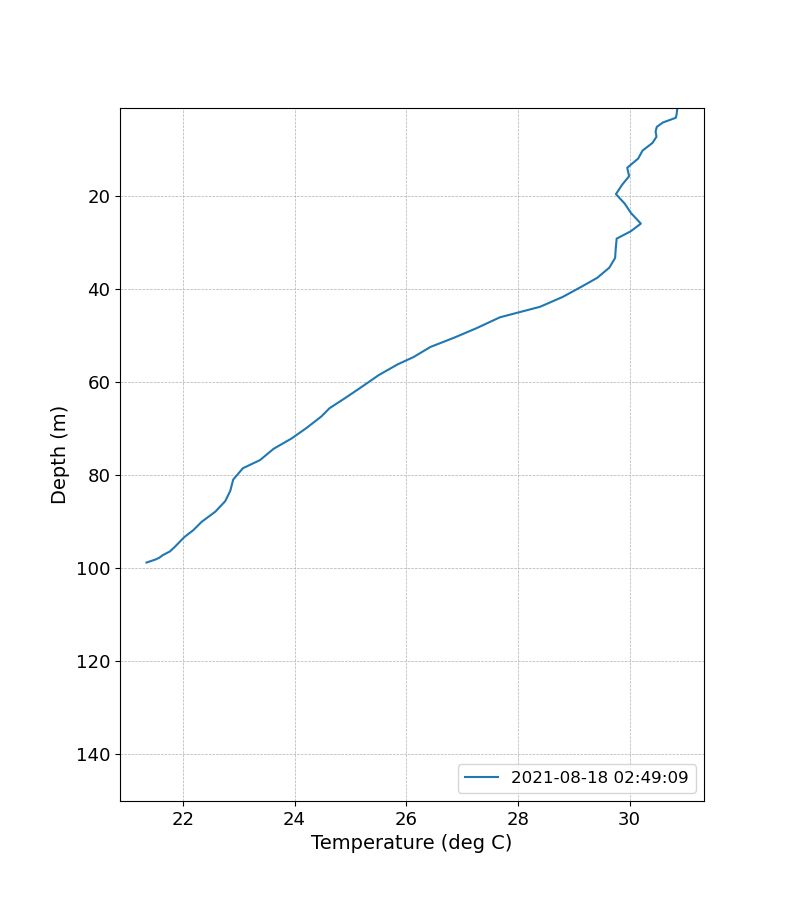

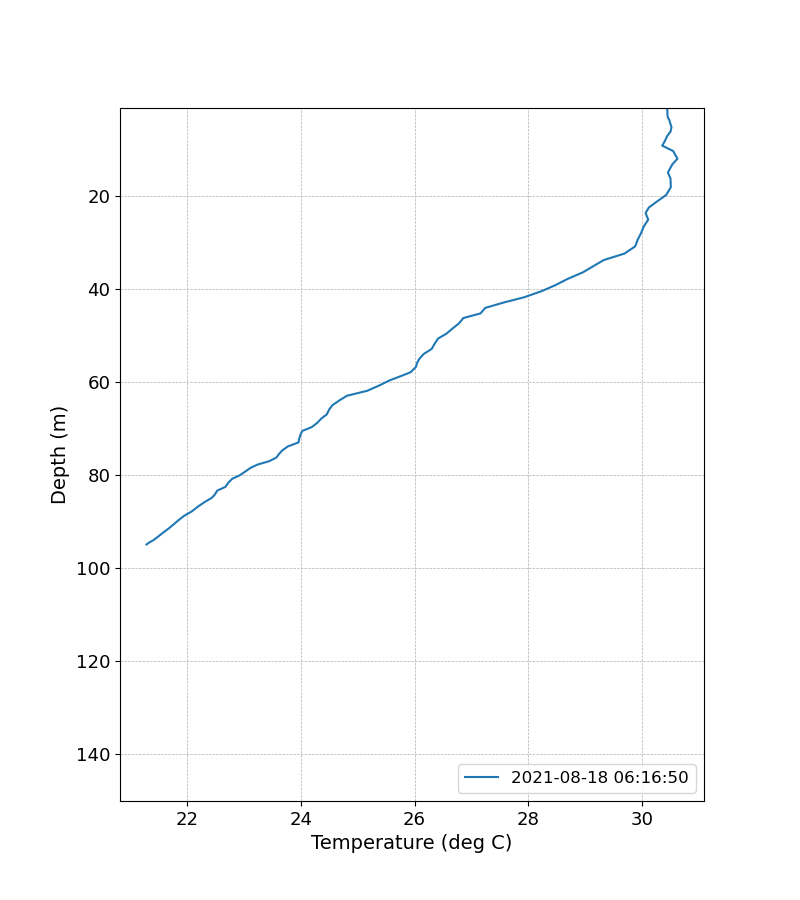

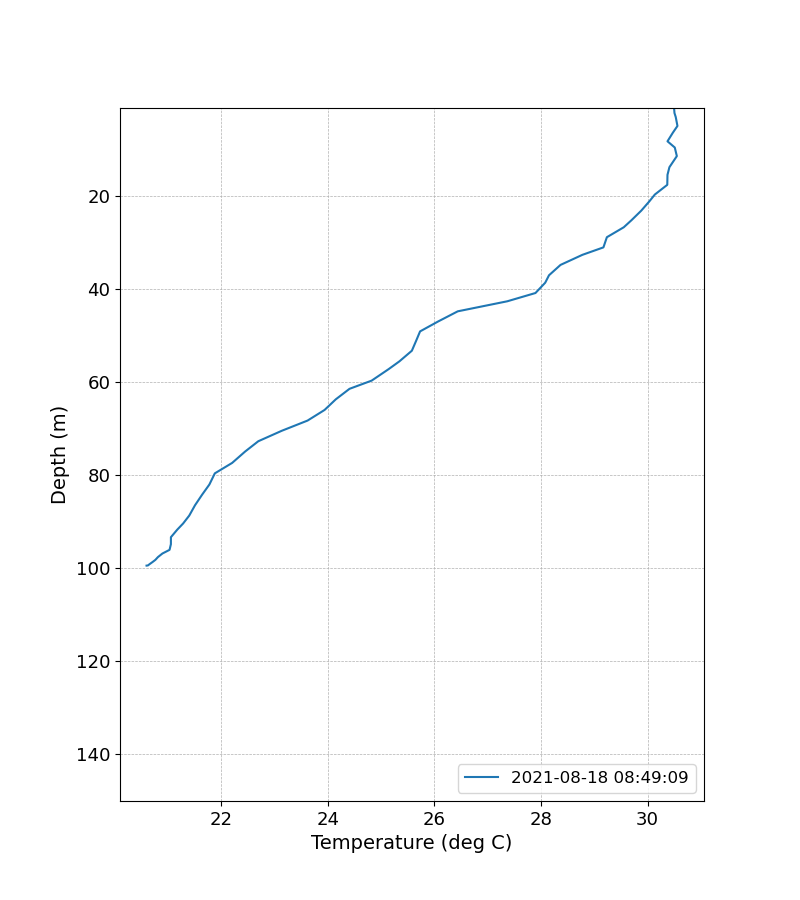

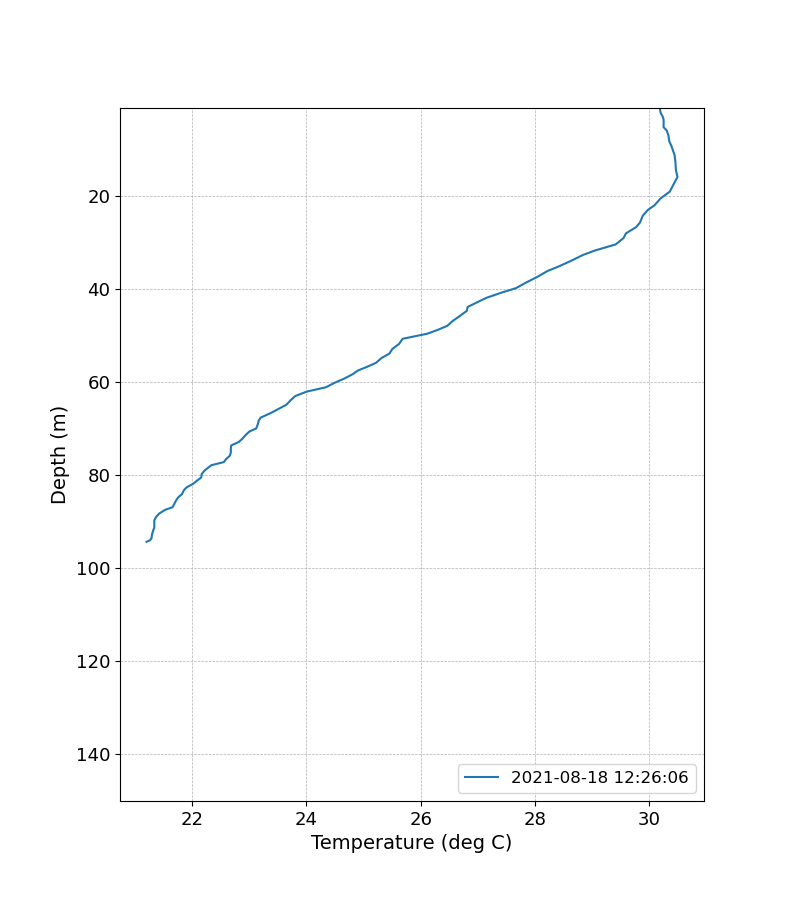

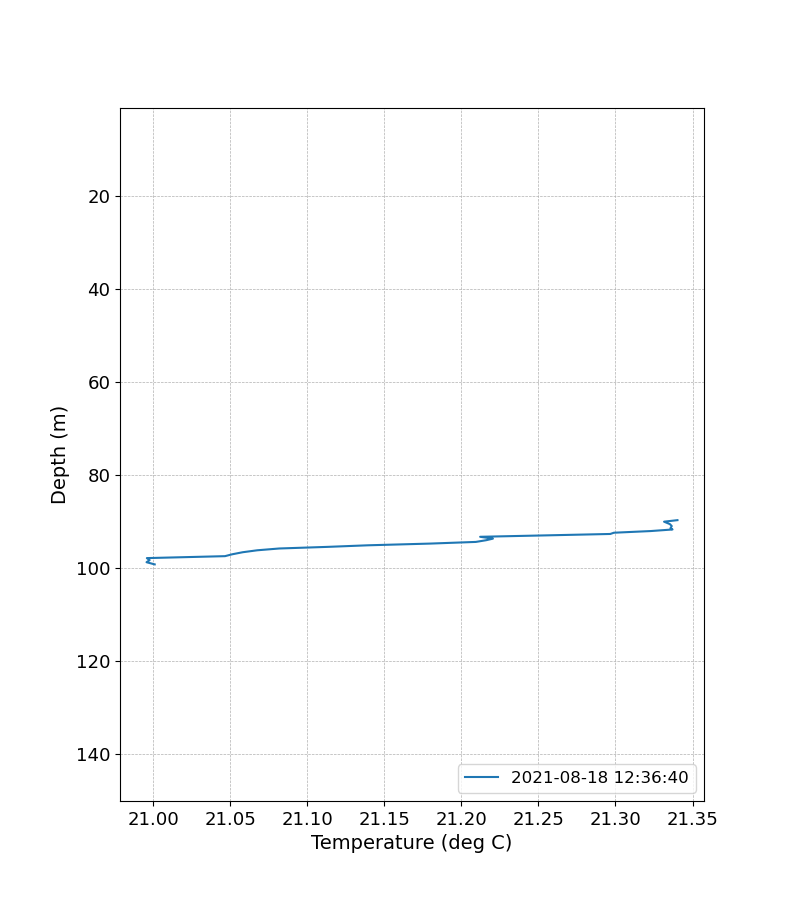

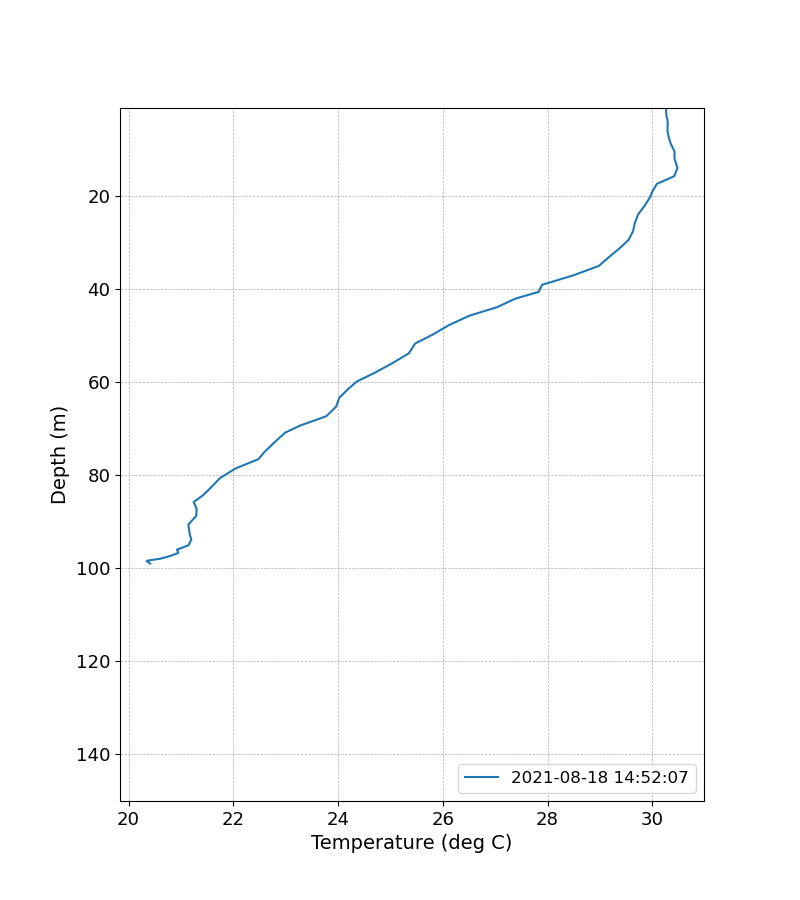

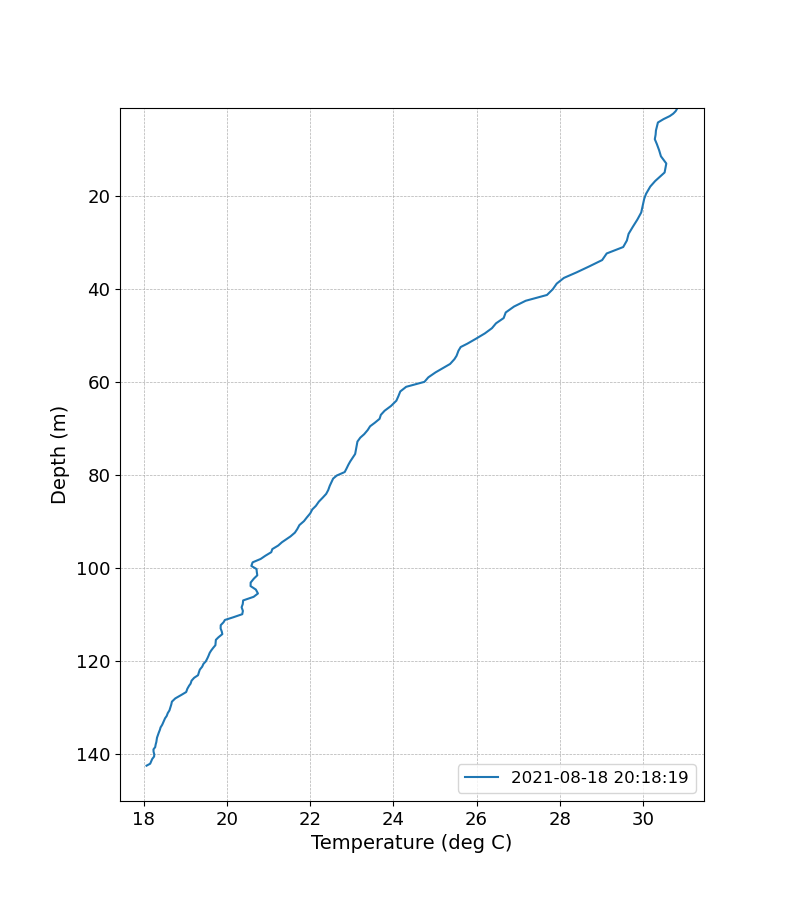

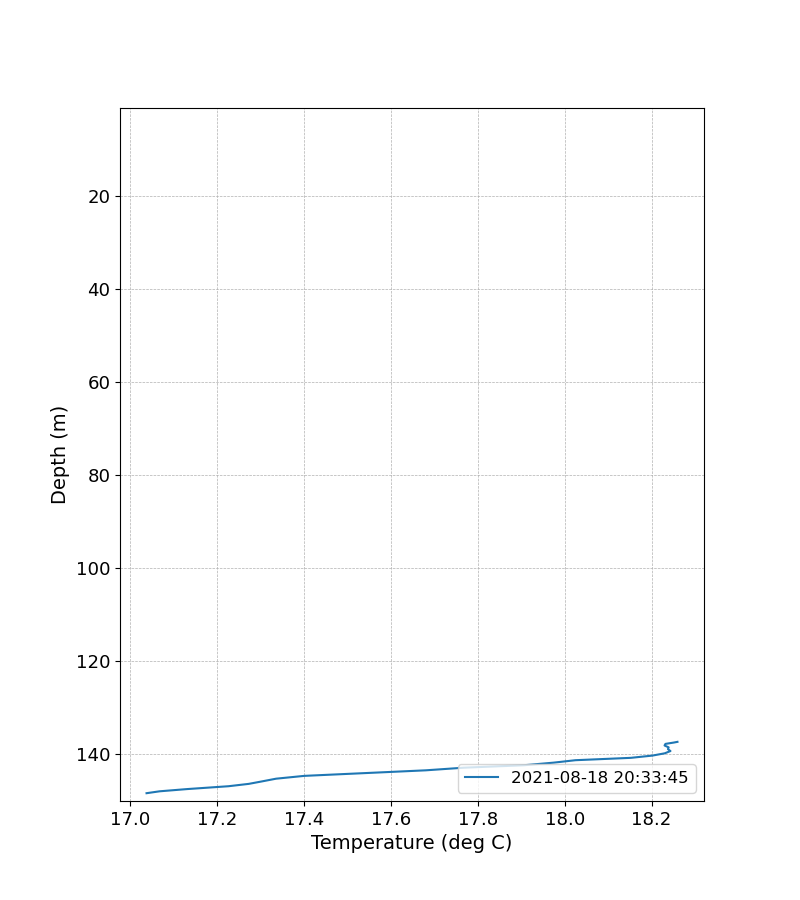

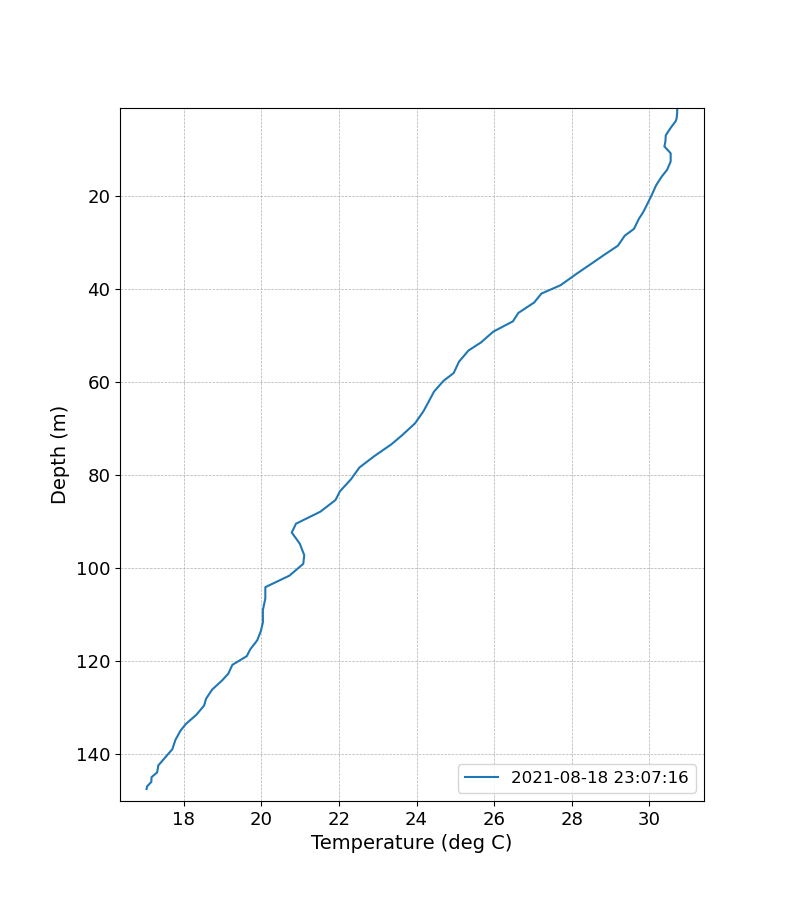

In [20]:
for g, new_df in grouped:
    fig, ax = plt.subplots(figsize=(8, 9))
    plt.subplots_adjust(right=0.88, left=0.15)
    ax.plot(new_df["temp"], new_df["depth"],
                label=g
    )
    
    ax.set_ylim([150, 1])
    ax.grid(True, linestyle='--', linewidth=.5)
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xlabel('Temperature (deg C)', fontsize=14)
    ax.set_ylabel('Depth (m)', fontsize=14)

    h, l = ax.get_legend_handles_labels()  # get labels and handles from ax1

    ax.legend(h, l, ncol=1, loc='lower right', fontsize=12)
    # plt.close()

In [11]:
import numpy as np

# profile_time = "2021-08-18 20:33:45"
profile_time = "2021-08-18 02:49:09"
profile = ng645.loc[pd.IndexSlice[profile_time:profile_time],:]
profile

lon        lat   pressure      depth     temp  \
time                                                                       
2021-08-18 02:49:09 -89.583321  28.008097   0.230191   0.228660  30.8362   
2021-08-18 02:49:09 -89.583321  28.008097   0.220183   0.218719  30.8464   
2021-08-18 02:49:09 -89.583321  28.008097   0.290241   0.288311  30.8266   
2021-08-18 02:49:09 -89.583321  28.008097   0.350291   0.347961  30.8429   
2021-08-18 02:49:09 -89.583321  28.008097   0.830690   0.825165  30.8555   
...                        ...        ...        ...        ...      ...   
2021-08-18 02:49:09 -89.583321  28.008097  97.010660  96.342880  21.7687   
2021-08-18 02:49:09 -89.583321  28.008097  97.781300  97.108040  21.6455   
2021-08-18 02:49:09 -89.583321  28.008097  98.411830  97.734070  21.5739   
2021-08-18 02:49:09 -89.583321  28.008097  98.792145  98.111680  21.5021   
2021-08-18 02:49:09 -89.583321  28.008097  99.412660  98.727770  21.3506   

                      salinity  conductivity  density (kg m-3)  
time                                                            
2021-08-18 02:49:09  32.591156     55.609497        1019.63680  
2021-08-18 02:49:09  32.591830     55.620800        1019.63370  
2021-08-18 02:49:09  32.592777     55.602300        1019.64154  
2021-08-18 02:49:09  32.589443     55.613700        1019.63367  
2021-08-18 02:49:09  32.595510     55.635800        1019.63590  
...                        ...           ...               ...  
2021-08-18 02:49:09  36.745052     51.960800        1026.03270  
2021-08-18 02:49:09  36.721634     51.800000        1026.05290  
2021-08-18 02:49:09  36.727180     51.730698        1026.08000  
2021-08-18 02:49:09  36.728096     51.655304        1026.10240  
2021-08-18 02:49:09  36.720936     51.484900        1026.14200  

[61 rows x 8 columns]

In [12]:
from holteandtalley import HolteAndTalley

h = HolteAndTalley(profile["pressure"],profile["temp"])

In [20]:
##The temperature algorithms mixed layer depth
# h.tempMLD
h.temp

In [14]:
ref_depth = 10
dtemp = 0.2

depth = profile["depth"]
temp = profile["temp"]

In [17]:
def mld_temp_crit(dtemp, ref_depth, depth, temp):
    """_summary_

    Args:
        dtemp (numpy.ndarray or pandas.Series or xarray.Series): _description_
        ref_depth (numpy.ndarray or pandas.Series or xarray.Series): _description_
        depth (numpy.ndarray or pandas.Series or xarray.Series): _description_
        temp (numpy.ndarray or pandas.Series or xarray.Series): _description_

    Returns:
        numpy.ndarray: _description_
    """
    # This function calculates the mixed layer depth and Mixed layer temperature
    # based on a temperature criteria: T - T_at_ref_depth <= dtemp
    # Inputs
    # dtemp: delta temperature from the mixed layer depth definition used
    # ref_depth: Reference depth from the mixed layer depth definition used
    # depth and temp: 1D vectors depth and temperature
    # Output
    # MLD and MLT: mixed layer depth and Mixed layer temperature
    # find where profile depths are greater than the reference depth
    ok_ref_depth = np.where(depth >= ref_depth)[0]
    ok_ref_depth

    # Get the first depth that is greater than the reference depth
    top_ref_depth = ok_ref_depth[0]
    top_ref_depth
    top_profile_depth = depth[top_ref_depth]

    # Check if the shallowest depth of the profile is deeper than the reference depth
    print(f"Depth (Reference): {ref_depth} m, Depth (Shallowest Profile): {top_profile_depth} m")
    if top_profile_depth < ref_depth+1:
        # Get the temperature at the first depth that is greater than the reference depth
        temp_ref_depth = temp[top_ref_depth]
        # temp_ref_depth

        # subtract every single temperature from frmo the reference depth
        delta_T = temp_ref_depth - temp 
        ok_mld_temp = np.where(delta_T <= dtemp)[0]
        # ok_mld_temp

        if ok_mld_temp.size == 0:
            MLD = np.nan
            MLT = np.nan
        else:
            MLD = depth[ok_mld_temp[-1]]
            MLT = np.nanmean(temp[ok_mld_temp])
        print(f"Reference Depth {ref_depth} (m) is deeper than shallowest Profile Depth {top_profile_depth} (m).")
        print(f"MLD: {MLD}, MLT: {MLT}")
        return MLD, MLT
    else:
        print(f"Reference Depth {ref_depth} (m) is shallower than shallowest Profile Depth {top_profile_depth} (m). Skipping this profile.")
        return np.nan, np.nan

In [18]:
mld_temp_crit(dtemp, ref_depth, profile["depth"], profile["temp"])

Depth (Reference): 10 m, Depth (Shallowest Profile): 10.160231 m
Reference Depth 10 (m) is deeper than shallowest Profile Depth 10.160231 (m).
MLD: 25.856897, MLT: 30.60859375


(25.856897, 30.60859375)

In [ ]:
import seawater
import numpy as np

# from ..upper_ocean_metrics.upper_ocean_metrics import ohc_from_profile, mld_dens_crit, temp_average_depth, potential_energy_anomaly100

def calculate_density(temperature, salinity, depth, lat):
    pressure = seawater.eos80.pres(depth, lat)
    density = seawater.eos80.dens(salinity, temperature, pressure)
    return density


################################################################################
def ohc_from_profile(depth, temp, dens):
    """
    This function Calculates the ocean heat content from a temperature and
    density profile (Leipper, Dale F., and Douglas Volgenau. "Hurricane heat
    potential of the Gulf of Mexico". Journal of Physical Oceanography 2.3
    (1972): 218-224).
    
    Q = ρ Cp ΔT ΔZ 
    
    Q: Hurricane Heat Potential
    ρ: density (gm cm-3)
    Cp: specific heat at constant pressure (cal cm-3) (C)
    ΔT: Average temperature difference above 26C for a given depth increment
    ΔZ: Depth increment (taken as 500cm)

    Args:
        depth (numpy.ndarray or pandas.Series or xarray.Series): depth (m)
        temp (numpy.ndarray or pandas.Series or xarray.Series): temperature (c)
        dens (numpy.ndarray or pandas.Series or xarray.Series): density (gm/cm^3)

    Returns:
        numpy.ndarray: Ocean heat content of the water column in kJ/cm^2
    """

    cp = 3985 #Heat capacity in J/(kg K)
    ok26 = temp >= 26 
    depth = np.abs(depth) #absolute value of depth

    if len(depth[ok26]) != 0:
        if np.nanmin(depth[ok26])>10:
            OHC = np.nan
        else:
            rho0 = np.nanmean(dens[ok26]) # don't include nans
            OHC = np.abs(cp * rho0 * np.trapz(temp[ok26]-26,depth[ok26]))
            OHC = OHC * 10**(-7) # in kJ/cm^2
    else:
        OHC = np.nan
    return OHC

# ################################################################################
# def mld_temp_crit(dtemp,ref_depth,depth,temp):
#     """_summary_

#     Args:
#         dtemp (numpy.ndarray or pandas.Series or xarray.Series): _description_
#         ref_depth (numpy.ndarray or pandas.Series or xarray.Series): _description_
#         depth (numpy.ndarray or pandas.Series or xarray.Series): _description_
#         temp (numpy.ndarray or pandas.Series or xarray.Series): _description_

#     Returns:
#         numpy.ndarray: _description_
#     """
#     # This function calculates the mixed layer depth and Mixed layer temperature
#     # based on a temperature criteria: T - T_at_ref_depth <= dtemp
#     # Inputs
#     # dtemp: delta temperature from the mixed layer depth definition used
#     # ref_depth: Reference depth from the mixed layer depth definition used
#     # depth and temp: 1D vectors depth and temperature
#     # Output
#     # MLD and MLT: mixed layer depth and Mixed layer temperature
        
#     ok_ref_depth = np.where(depth >= ref_depth)[0][0] # find where depths are all greater than reference depths
#     temp_ref_depth = temp[ok_ref_depth]
#     delta_T = temp_ref_depth - temp # subtract every single temperature from frmo the reference depth
#     ok_mld_temp = np.where(delta_T <= dtemp)[0]

#     if ok_mld_temp.size == 0:
#         MLD = np.nan
#         MLT = np.nan
#     else:
#         MLD = depth[ok_mld_temp[-1]]
#         MLT = np.nanmean(temp[ok_mld_temp])

#     return MLD, MLT
################################################################################
def mld_temp_crit(dtemp, ref_depth, depth, temp):
    """_summary_

    Args:
        dtemp (numpy.ndarray or pandas.Series or xarray.Series): _description_
        ref_depth (numpy.ndarray or pandas.Series or xarray.Series): _description_
        depth (numpy.ndarray or pandas.Series or xarray.Series): _description_
        temp (numpy.ndarray or pandas.Series or xarray.Series): _description_

    Returns:
        numpy.ndarray: _description_
    """
    # This function calculates the mixed layer depth and Mixed layer temperature
    # based on a temperature criteria: T - T_at_ref_depth <= dtemp
    # Inputs
    # dtemp: delta temperature from the mixed layer depth definition used
    # ref_depth: Reference depth from the mixed layer depth definition used
    # depth and temp: 1D vectors depth and temperature
    # Output
    # MLD and MLT: mixed layer depth and Mixed layer temperature
        
    ok_ref_depth = np.where(depth >= ref_depth)[0][0] # find where depths are all greater than reference depths
    temp_ref_depth = temp[ok_ref_depth]
    delta_T = temp_ref_depth - temp # subtract every single temperature from frmo the reference depth
    ok_mld_temp = np.where(delta_T <= dtemp)[0]

    if ok_mld_temp.size == 0:
        MLD = np.nan
        MLT = np.nan
    else:
        MLD = depth[ok_mld_temp[-1]]
        MLT = np.nanmean(temp[ok_mld_temp])

    return MLD, MLT

################################################################################
def mld_dens_crit(drho, ref_depth, depth, temp, dens):
    """_summary_

    Args:
        drho (numpy.ndarray or pandas.Series or xarray.Series): _description_
        ref_depth (numpy.ndarray or pandas.Series or xarray.Series): _description_
        depth (numpy.ndarray or pandas.Series or xarray.Series): _description_
        temp (numpy.ndarray or pandas.Series or xarray.Series): _description_
        dens (numpy.ndarray or pandas.Series or xarray.Series): _description_

    Returns:
        np.ndarray: _description_
    """
    # This function calculates the mixed layer depth and Mixed layer temperature
    # based on a density criteria: rho_at_ref_depth - rho <= drho
    # Inputs
    # drho: delta density from the mixed layer depth definition used
    # ref_depth: Reference depth from the mixed layer depth definition used
    # depth, temp and dens: 1D vectors depth, temperature and density
    # Output
    # MLD and MLT: mixed layer depth and Mixed layer temperature

    ok_ref_depth = np.where(depth >= ref_depth)[0][0]
    rho_ref_depth = dens[ok_ref_depth]
    delta_rho = -(rho_ref_depth - dens)
    ok_mld_rho = np.where(delta_rho <= drho)[0]

    if ok_mld_rho.size == 0:
        MLD = np.nan
        MLT = np.nan
    else:
        MLD = depth[ok_mld_rho[-1]]
        MLT = np.nanmean(temp[ok_mld_rho])

    return MLD, MLT

################################################################################
def temp_average_depth(depth, temp, depth_range=[0, 100]):
    """
    This function calculates the depth average temperature in the top 100 m

    Args:
        depth (numpy.ndarray or pandas.Series or xarray.Series): depth
        temp (numpy.ndarray or pandas.Series or xarray.Series): temperature

    Returns:
        np.ndarray: depth average temperature in the top 100 meters
    """
    # 
    # meters
    # Inputs
    # depth, temp: 1D vectors depth and temperature
    # Output
    # T100: 

    # Get index where depths lie between depth_range
    ind = (depth_range[0] <= np.abs(depth)) & (np.abs(depth) <= depth_range[1])
    
    if len( np.where( np.isnan(temp[ind]) )[0] ) > 10:
        averaged = np.nan
    else:
        averaged = np.nanmean(temp[ind])
    return averaged

################################################################################
def potential_energy_anomaly100(depth, dens):
    """
    This function calculates the potential energy anomaly
    (Simpson J, Brown J, Matthews J, Allen G (1990) Tidal straining, density
    currents and stirring in the control of estuarine stratification.
    Estuaries 13(2):125–132), in the top 100 meters

    Args:
        depth (numpy.ndarray or pandas.Series or xarray.Series): depth
        dens (numpy.ndarray or pandas.Series or xarray.Series): density

    Returns:
        np.ndarray: potential energy anomaly in J/m^3
    """

    g = 9.8 #m/s
    dindex = np.fliplr(np.where(np.asarray(np.abs(depth)) <= 100))[0]
    if len(dindex) == 0:
        PEA = np.nan
    else:
        zz = np.asarray(np.abs(depth[dindex]))
        denss = np.asarray(dens[dindex])
        ok = np.isfinite(denss)
        z = zz[ok]
        densi = denss[ok]
        if len(z)==0 or len(densi)==0 or np.min(zz) > 10 or np.max(zz) < 30:
            PEA = np.nan
        else:
            if z[-1] - z[0] > 0:
                # So PEA is < 0
                # sign = -1
                # Adding 0 to sigma integral is normalized
                z = np.append(0,z)
            else:
                # So PEA is < 0
                # sign = 1
                # Adding 0 to sigma integral is normalized
                z = np.flipud(z)
                z = np.append(0,z)
                densit = np.flipud(densi)

            # adding density at depth = 0
            densitt = np.interp(z,z[1:],densit)
            density = np.flipud(densitt)

            # defining sigma
            max_depth = np.nanmax(zz[ok])
            sigma = -1*z/max_depth
            sigma = np.flipud(sigma)

            rhomean = np.trapz(density,sigma,axis=0)
            drho = rhomean - density
            torque = drho * sigma
            PEA = g * max_depth * np.trapz(torque,sigma,axis=0)

    return PEA

def calculate_upper_ocean_metrics(time, temp, salinity, depth, lat, density=None):
    """_summary_

    Args:
        time (_type_): time
        temp (_type_): temperature (c)
        salinity (_type_): salinity (1)
        depth (_type_): depth (m)
        density (_type_, optional): _description_. Defaults to None.
        lat (_type_, optional): _description_. Defaults to None.

    Returns:
        _type_: _description_
    """
    if not isinstance(density, pd.Series):
        density = pd.Series(dtype=object)
    
        
    # Reference variables
    dtemp = 0.2
    reference_depth = 10
    drho = 0.125

    # Init empty dict 
    ddict = {}
     
    # Calculate density of gofs profile. Converting from depth (m) to pressure 
    # internally.
    if not density.any():
        density = calculate_density(temp, salinity, depth, lat)
    
    # Ocean heat content
    # Depth, temperature, density
    ohc = ohc_from_profile(depth, temp, density)
    ddict['ocean_heat_content'] = ohc

    # Mixed Layer Depth calculated from temperature
    # dtemp, reference depth, depth, and temperature
    depth_mld_t, temp_mld_t= mld_temp_crit(dtemp, reference_depth, depth, temp)
    ddict['mixed_layer_depth_from_temp'] = depth_mld_t
    ddict['mixed_layer_temp_from_temp'] = temp_mld_t

    # Mixed Layer Depth calculated from density
    # ddensity, reference depth, depth, temperature, and density
    depth_mld_d, temp_mld_d = mld_dens_crit(drho, reference_depth, depth, temp,  density)
    ddict['mixed_layer_depth_from_density'] = depth_mld_d
    ddict['mixed_layer_temp_from_density'] = temp_mld_d

    # Average temperature in the top 100m 
    # depth, temperature
    ddict['average_temp_mldt_to_100m'] = temp_average_depth(depth, temp, depth_range=[depth_mld_t,100])
    ddict['average_temp_mlds_to_100m'] = temp_average_depth(depth, temp, depth_range=[depth_mld_d,100])
    ddict['average_temp_000m_to_100m'] = temp_average_depth(depth, temp, depth_range=[0,100])
    ddict['average_temp_100m_to_200m'] = temp_average_depth(depth, temp, depth_range=[100,200])
    ddict['average_temp_200m_to_300m'] = temp_average_depth(depth, temp, depth_range=[200,300])
    ddict['average_temp_300m_to_400m'] = temp_average_depth(depth, temp, depth_range=[300,400])
    ddict['average_temp_400m_to_500m'] = temp_average_depth(depth, temp, depth_range=[400,500])
    ddict['average_temp_500m_to_600m'] = temp_average_depth(depth, temp, depth_range=[500,600])   
    ddict['average_temp_600m_to_700m'] = temp_average_depth(depth, temp, depth_range=[600,700])
    ddict['average_temp_700m_to_800m'] = temp_average_depth(depth, temp, depth_range=[700,800])
    ddict['average_temp_800m_to_900m'] = temp_average_depth(depth, temp, depth_range=[800,900])
    ddict['average_temp_900m_to_1000m'] = temp_average_depth(depth, temp, depth_range=[900,1000])


    # Potential Energy Anomaly in the top 100 meters
    # depth, density
    pea = potential_energy_anomaly100(depth, density)
    ddict['potential_energy_anomaly_100m'] = pea

    # Salinity at surface
    # Should this be an average or the very first reading?
    sal_surf_idx = np.nanargmin(depth)
    ddict['salinity_surface'] = salinity[sal_surf_idx]
    # ddict['salinity_surface_depth'] = salinity[sal_surf_idx]

    # Salinity maximum
    try:
        sal_max_idx = np.nanargmax(salinity)
        ddict['salinity_max'] = salinity[sal_max_idx]
        ddict['salinity_max_depth'] = depth[sal_max_idx]
    except ValueError:
        ddict['salinity_max'] = np.nan
        ddict['salinity_max_depth'] = np.nan

    df = pd.DataFrame(data=ddict, index=[pd.to_datetime(time)])
    return df

In [ ]:
# Glider - Iterate grouped glider times (each time is a profile)
glider_df = pd.DataFrame()

for time, group in ng645.groupby(level=0):
    # print(time)
    gldf = calculate_upper_ocean_metrics(
        time,
        group['temp'].to_numpy(), 
        group['salinity'].to_numpy(), 
        group['depth'].to_numpy(), 
        group['lat'].to_numpy(),
        )
    glider_df = pd.concat([glider_df, gldf])
glider_df

In [ ]:
var_title = "mixed_layer_depth_from_temp"

# Create figure 
fig, ax = plt.subplots(figsize=(13.333, 7.5))

# Plot each model 
h1 = ax.plot(ng645.index, ng645[k], 'b-o', markersize=2, label='NG645')
h2 = ax.plot(gofs.index, gofs[k], 'g-o', markersize=2, label='GOFS')
h3 = ax.plot(rtofs.index, rtofs[k], 'r-o', markersize=2, label='RTOFS')
h4 = ax.plot(copernicus.index, copernicus[k], 'm-o', markersize=2, label='Copernicus')

# Add grid
ax.grid(True)

# # Add minor grid
ax.grid(True, which="major")
# ax.grid(True, which="minor", linestyle="-.", linewidth=0.25, alpha=.5)
# plt.minorticks_on()

# Make the plot have minor ticks
ax.xaxis.set_minor_locator(mdates.DayLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

# Set axis limits 
ax.set_ylim(v['ylim'])

# Invert axis if flip_y is True
if v['flip_y']:
    ax.invert_yaxis()

# Adjust axes labels
ax.set_xlabel('Datetime (GMT)', fontsize=14, fontweight='bold')
ax.set_ylabel(var_title, fontsize=14, fontweight='bold')

# Create and set title
title = f"Model Comparisons - {glider_id}\n{t0} to {t1}\n{v['name']}"
ax.set_title(title, fontsize=16, fontweight="bold")

# Add legend
plt.legend()

# # Save figure 
# savedir = path_plot / f"{glid}"
# export_fig(savedir, f'glider_{k}_{datefmt}.png', dpi=200)
# plt.close()
